## Problem Statement
 

### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 
For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

### Understanding and Defining Churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

 

### Definitions of Churn

There are various ways to define churn, such as:

#### Revenue-based churn: 

Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 
The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

#### Usage-based churn: 

Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, you will use the usage-based definition to define churn.

 

#### High-value Churn

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 
In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

 

### Understanding the Business Objective and the Data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

 

### Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

#### The ‘good’ phase: 

In this phase, the customer is happy with the service and behaves as usual.

#### The ‘action’ phase: 

The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

#### The ‘churn’ phase: 

In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 
In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.


#### Data Dictionary

The dataset can be download using this link. The data dictionary is provided for download below.

The data dictionary contains meanings of abbreviations. Some frequent ones are loc (local), IC (incoming), OG (outgoing), T2T (telecom operator to telecom operator), T2O (telecom operator to another operator), RECH (recharge) etc.

 

The attributes containing 6, 7, 8, 9 as suffixes imply that those correspond to the months 6, 7, 8, 9 respectively.

 

#### Data Preparation
The following data preparation steps are crucial for this problem:

 

1. Derive new features

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

 

2. Filter high-value customers

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

 

After filtering the high-value customers, you should get about 29.9k rows.

 

3. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

 

#### Modelling

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

 

In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.

 

Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance. 

 

You can take the following suggestive steps to build the model:

Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

Derive new features.

Reduce the number of variables using PCA.

Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

Finally, choose a model based on some evaluation metric.


The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.


Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.


After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.


Finally, recommend strategies to manage customer churn based on your observations.

## DATA DICTIONARY

Acronyms    ----------- 	Descriptions

MOBILE_NUMBER -         Customer phone number

CIRCLE_ID	   -          Telecom circle area to which the customer belongs to

LOC	Local calls -        within same telecom circle

STD	STD calls -          outside the calling circle

IC	            -         Incoming calls

OG 	             -        Outgoing calls

T2T	              -       Operator T to T, i.e. within same operator (mobile to mobile)

T2M    	           -      Operator T to other operator mobile

T2O    	            -     Operator T to other operator fixed line

T2F    	             -    Operator T to fixed lines of T

T2C    	              -   Operator T to it’s own call center

ARPU    	           -  Average revenue per user

MOU    	                - Minutes of usage - voice calls

AON    	                 - Age on network - number of days the customer is using the operator T network

ONNET   	           -  All kind of calls within the same operator network

OFFNET    	            - All kind of calls outside the operator T network

ROAM	                 - Indicates that customer is in roaming zone during the call

SPL   -	                 Special calls

ISD    -	                 ISD calls

RECH    -	             Recharge

NUM    	 -                Number

AMT    	  -               Amount in local currency

MAX    	   -              Maximum

DATA    	-             Mobile internet

3G    	     -            3G network

AV    	      -           Average

VOL    	       -          Mobile internet usage volume (in MB)

2G    	        -         2G network

PCK    	         -        Prepaid service schemes called - PACKS

NIGHT    	   -          Scheme to use during specific night hours only

MONTHLY    	    -         Service schemes with validity equivalent to a month

SACHET   	     -        Service schemes with validity smaller than a month

*.6    	          -       KPI for the month of June

*.7    	           -      KPI for the month of July

*.8    	            -     KPI for the month of August

*.9    	             -    KPI for the month of September

FB_USER	              -   Service scheme to avail services of Facebook and similar social networking sites

VBC    	               -  Volume based cost - when no specific scheme is not purchased and paid as per usage

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
churn = pd.read_csv("./telecom_churn_data.csv")

In [4]:
churn.shape

(99999, 226)

In [5]:
churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
churn.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [8]:
# no of unique customers, rather mobile nos
churn['mobile_number'].nunique()

99999

In [9]:
churn.isnull().sum(axis = 1)

0         97
1         20
2         30
3         40
4         30
        ... 
99994     40
99995     40
99996    118
99997      0
99998    120
Length: 99999, dtype: int64

In [10]:
# churn.isnull().all(axis=0).sum()

In [11]:
round(100 * (churn.isnull().sum() / len(churn.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

- Observations:
    1.   Some columns has lot of missing values like 73%, 74%,  
    
    {
        
        date_of_last_rech_data_6, date_of_last_rech_data_7, date_of_last_rech_data_8, date_of_last_rech_data_9, 
        
        total_rech_data_6, total_rech_data_7, total_rech_data_8, total_rech_data_9,
        
        max_rech_data_6, max_rech_data_7, max_rech_data_8, max_rech_data_9,
        
        count_rech_2g_6, count_rech_2g_7, count_rech_2g_8, count_rech_2g_9,
        
        count_rech_3g_6, count_rech_3g_7, count_rech_3g_8, count_rech_3g_9
        
        av_rech_amt_data_6, av_rech_amt_data_7, av_rech_amt_data_8, av_rech_amt_data_9,
        
        arpu_3g_6, arpu_3g_7, arpu_3g_8, arpu_3g_9,
        
        arpu_2g_6, arpu_2g_7, arpu_2g_8, arpu_2g_9,
        
        night_pck_user_6, night_pck_user_7, night_pck_user_8, night_pck_user_9,
        
        fb_user_6,fb_user_7, fb_user_8, fb_user_9
        
    }
    
    Most of these seems to be KPIs of User.
    
    So instead of removing these, we can impute them with the 0.
    
    and drop  date_of_last_rech_data_* column, as its a date.
    
    
    2.   Many columns has missing values like 3% - 7%

In [12]:
columnsToImpute = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                   "max_rech_data_6", "max_rech_data_7", "max_rech_data_8", "max_rech_data_9", 
                   "count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8", "count_rech_2g_9", 
                   "count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8", "count_rech_3g_9",
                   "av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8", "av_rech_amt_data_9", 
                   "arpu_3g_6", "arpu_3g_7", "arpu_3g_8", "arpu_3g_9", 
                   "arpu_2g_6", "arpu_2g_7", "arpu_2g_8", "arpu_2g_9", 
                   "night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9", 
                   "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"
                  ]


                   
           
for col in columnsToImpute:
    churn[col].fillna(0, inplace = True)
                   

In [13]:
churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [14]:
columnsToRemove = ["date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8", "date_of_last_rech_data_9"]

churn.drop(columnsToRemove, axis = 1, inplace = True)

In [15]:
churn.shape

(99999, 222)

In [16]:
round(100 * (churn.isnull().sum() / len(churn.index)), 2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou

In [17]:
missing_5_percent_values_columns = []

for col in list(churn.columns):
    if round(100*(churn[col].isnull().sum()/churn.shape[0])) > 5:
        missing_5_percent_values_columns.append(col)
        
print(missing_5_percent_values_columns)
print("\nTotal columsn : ", len(missing_5_percent_values_columns))

['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9']

Total columsn :  29


In [18]:
# total missing values from all of these 29 columns
churn[missing_5_percent_values_columns].isnull().all(axis=1).sum()

7745

In [19]:
# lets impute them with 0
           
for col in missing_5_percent_values_columns:
    churn[col].fillna(0, inplace = True)

In [20]:
print(churn[missing_5_percent_values_columns].isna().all(axis=1).sum())
churn[churn[missing_5_percent_values_columns].isnull().all(axis=1)][missing_5_percent_values_columns].head()

0


Empty DataFrame
Columns: [onnet_mou_9, offnet_mou_9, roam_ic_mou_9, roam_og_mou_9, loc_og_t2t_mou_9, loc_og_t2m_mou_9, loc_og_t2f_mou_9, loc_og_t2c_mou_9, loc_og_mou_9, std_og_t2t_mou_9, std_og_t2m_mou_9, std_og_t2f_mou_9, std_og_t2c_mou_9, std_og_mou_9, isd_og_mou_9, spl_og_mou_9, og_others_9, loc_ic_t2t_mou_9, loc_ic_t2m_mou_9, loc_ic_t2f_mou_9, loc_ic_mou_9, std_ic_t2t_mou_9, std_ic_t2m_mou_9, std_ic_t2f_mou_9, std_ic_t2o_mou_9, std_ic_mou_9, spl_ic_mou_9, isd_ic_mou_9, ic_others_9]
Index: []

In [21]:
churn=churn[~churn[missing_5_percent_values_columns].isnull().all(axis=1)]

In [22]:
churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00         0.00           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0           0.00            NaN            NaN           0.00           0.00   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00              0.00   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00              0.00   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [23]:
churn.shape

(99999, 222)

In [24]:
round(100 * (churn.isnull().sum() / len(churn.index)), 2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             0.00
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            0.00
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           0.00
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           0.00
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        0.00
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou

In [25]:
churn.shape

(99999, 222)

In [26]:
missing_2_percent_values_columns = []

for col in list(churn.columns):
    if round(100*(churn[col].isnull().sum()/churn.shape[0])) >= 2:
        missing_2_percent_values_columns.append(col)
        
print(missing_2_percent_values_columns)
print("\nTotal columsn : ", len(missing_2_percent_values_columns))

['last_date_of_month_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

In [27]:
# churn_1 = churn[churn[missing_2_percent_values_columns].isnull().all(axis=1)]

# # [missing_2_percent_values_columns].head()
# churn_1.head()

date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
missing_2_percent_values_columns = [c for c in missing_2_percent_values_columns if c not in date_columns]
print(missing_2_percent_values_columns)
print(len(missing_2_percent_values_columns))

# total missing values from all of these 85 columns
# churn[missing_2_percent_values_columns].isnull().all(axis=1).sum()

['last_date_of_month_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

In [28]:
churn = churn[~churn[missing_2_percent_values_columns].isnull().all(axis=1)]
churn.shape

(99593, 222)

In [29]:
for col in missing_2_percent_values_columns:
    churn[col].fillna(0, inplace = True)
    
churn.shape

(99593, 222)

In [30]:
churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100         0.00   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00            0.0           0.00           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0           0.00            0.0           0.00           0.00           0.00   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [31]:
round(100 * (churn.isnull().sum() / len(churn.index)), 2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          0.61
std_og_t2o_mou          0.61
loc_ic_t2o_mou          0.61
last_date_of_month_6    0.00
last_date_of_month_7    0.28
last_date_of_month_8    0.75
last_date_of_month_9    0.00
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             0.00
onnet_mou_7             0.00
onnet_mou_8             0.00
onnet_mou_9             0.00
offnet_mou_6            0.00
offnet_mou_7            0.00
offnet_mou_8            0.00
offnet_mou_9            0.00
roam_ic_mou_6           0.00
roam_ic_mou_7           0.00
roam_ic_mou_8           0.00
roam_ic_mou_9           0.00
roam_og_mou_6           0.00
roam_og_mou_7           0.00
roam_og_mou_8           0.00
roam_og_mou_9           0.00
loc_og_t2t_mou_6        0.00
loc_og_t2t_mou_7        0.00
loc_og_t2t_mou_8        0.00
loc_og_t2t_mou_9        0.00
loc_og_t2m_mou_6        0.00
loc_og_t2m_mou

In [32]:
missing_values_columns = []

for col in list(churn.columns):
    if round(100*(churn[col].isnull().sum()/churn.shape[0])) > 0:
        missing_values_columns.append(col)
        
print(missing_values_columns)
print("\nTotal columsn : ", len(missing_values_columns))

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']

Total columsn :  8


In [33]:
missing_values_columns = [col for col in missing_values_columns if col not in date_columns]
missing_values_columns

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_8']

In [34]:
for col in missing_values_columns:
    churn[col].fillna(churn[col].mode()[0], inplace=True)
    
churn.shape

(99593, 222)

In [35]:
round(100 * (churn.isnull().sum() / len(churn.index)), 2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          0.00
std_og_t2o_mou          0.00
loc_ic_t2o_mou          0.00
last_date_of_month_6    0.00
last_date_of_month_7    0.28
last_date_of_month_8    0.00
last_date_of_month_9    0.00
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             0.00
onnet_mou_7             0.00
onnet_mou_8             0.00
onnet_mou_9             0.00
offnet_mou_6            0.00
offnet_mou_7            0.00
offnet_mou_8            0.00
offnet_mou_9            0.00
roam_ic_mou_6           0.00
roam_ic_mou_7           0.00
roam_ic_mou_8           0.00
roam_ic_mou_9           0.00
roam_og_mou_6           0.00
roam_og_mou_7           0.00
roam_og_mou_8           0.00
roam_og_mou_9           0.00
loc_og_t2t_mou_6        0.00
loc_og_t2t_mou_7        0.00
loc_og_t2t_mou_8        0.00
loc_og_t2t_mou_9        0.00
loc_og_t2m_mou_6        0.00
loc_og_t2m_mou

In [36]:
columns_showing_no_variance = []

for col in list(churn.columns):
    if churn[col].nunique() <= 1:
        print("Col name: ", col, " \t\t ", churn[col].nunique(), "\t\t ", churn[col].unique())
        columns_showing_no_variance.append(col)
    
    
print("Total columns: ", len(columns_showing_no_variance)) 

Col name:  circle_id  		  1 		  [109]
Col name:  loc_og_t2o_mou  		  1 		  [0.]
Col name:  std_og_t2o_mou  		  1 		  [0.]
Col name:  loc_ic_t2o_mou  		  1 		  [0.]
Col name:  last_date_of_month_6  		  1 		  ['6/30/2014']
Col name:  last_date_of_month_7  		  1 		  ['7/31/2014' nan]
Col name:  last_date_of_month_8  		  1 		  ['8/31/2014']
Col name:  std_og_t2c_mou_6  		  1 		  [0.]
Col name:  std_og_t2c_mou_7  		  1 		  [0.]
Col name:  std_og_t2c_mou_8  		  1 		  [0.]
Col name:  std_og_t2c_mou_9  		  1 		  [0.]
Col name:  std_ic_t2o_mou_6  		  1 		  [0.]
Col name:  std_ic_t2o_mou_7  		  1 		  [0.]
Col name:  std_ic_t2o_mou_8  		  1 		  [0.]
Col name:  std_ic_t2o_mou_9  		  1 		  [0.]
Total columns:  15


In [37]:
print("Before: ", churn.shape)
churn.drop(columns_showing_no_variance, axis=1, inplace=True)
print("After: ", churn.shape)

Before:  (99593, 222)
After:  (99593, 207)


In [38]:
for col in date_columns:
    print(col, " ==  ", churn[col].dtype  ,"\n", churn[col].unique(), "\n")

date_of_last_rech_6  ==   object 
 ['6/21/2014' '6/29/2014' '6/17/2014' '6/28/2014' '6/26/2014' '6/19/2014'
 '6/27/2014' '6/25/2014' '6/14/2014' '6/18/2014' '6/20/2014' '6/30/2014'
 '6/23/2014' nan '6/22/2014' '6/24/2014' '6/12/2014' '6/3/2014'
 '6/11/2014' '6/16/2014' '6/10/2014' '6/15/2014' '6/13/2014' '6/7/2014'
 '6/8/2014' '6/6/2014' '6/2/2014' '6/4/2014' '6/5/2014' '6/1/2014'
 '6/9/2014'] 

date_of_last_rech_7  ==   object 
 ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014'] 

date_of_last_rech_8  ==   object 
 ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014

In [39]:
for col in date_columns:
    churn[col] = pd.to_datetime(churn[col], format='%m/%d/%Y')

In [40]:
for col in date_columns:
    churn[col].fillna(churn[col].mode()[0], inplace=True)

In [41]:
round(100 * (churn.isnull().sum() / len(churn.index)), 2)

mobile_number           0.0
last_date_of_month_9    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
arpu_9                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
onnet_mou_9             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
offnet_mou_9            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_ic_mou_9           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
roam_og_mou_9           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2t_mou_9        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_7        0.0
loc_og_t2m_mou_8        0.0
loc_og_t2m_mou_9        0.0
loc_og_t2f_mou_6        0.0
loc_og_t2f_mou_7        0.0
loc_og_t2f_mou_8        0.0
loc_og_t2f_mou_9        0.0
loc_og_t2c_mou_6        0.0
loc_og_t2c_mou_7    

In [42]:
# renaming some columns acc to standart naming _6, _7, _8, _9
churn.rename(columns={
    'jun_vbc_3g' : 'vbc_3g_6', 
    'jul_vbc_3g' : 'vbc_3g_7', 
    'aug_vbc_3g' : 'vbc_3g_8',
    'sep_vbc_3g' : 'vbc_3g_9'}, 
    inplace=True)

In [43]:
churn.head()

mobile_number last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  \
0     7000842753            9/30/2014  197.385  214.816  213.803   21.100   
1     7001865778            9/30/2014   34.047  355.074  268.321   86.285   
2     7001625959            9/30/2014  167.690  189.058  210.226  290.714   
3     7001204172            9/30/2014  221.338  251.102  508.054  389.500   
4     7000142493            9/30/2014  261.636  309.876  238.174  163.426   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0         0.00         0.00         0.00         0.00          0.00   
1        24.11        78.68         7.68        18.34         15.74   
2        11.54        55.24        37.26        74.81        143.33   
3        99.91        54.39       310.98       241.71        123.31   
4        50.31       149.44        83.89        58.78         76.96   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00            0.0           0.00   
1         99.84        304.76         53.76            0.0           0.00   
2        220.59        208.36        118.91            0.0           0.00   
3        109.01         71.68        113.54            0.0          54.86   
4         91.88        124.26         45.81            0.0           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00            0.0           0.00           0.00   
1           0.00           0.00            0.0           0.00           0.00   
2           0.00          38.49            0.0           0.00           0.00   
3          44.38           0.00            0.0          28.09          39.04   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00              0.00              0.00              0.00   
1           0.00             23.88             74.56              7.68   
2          70.94              7.19             28.74             13.58   
3           0.00             73.68             34.81             10.61   
4           0.00             50.31            149.44             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
1             18.34             11.51             75.94            291.86   
2             14.39             29.34             16.86             38.46   
3             15.49            107.43             83.21             22.46   
4             58.78             67.64             91.88            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             53.76              0.00              0.00              0.00   
2             28.16             24.11             21.79             15.61   
3             65.46              1.91              0.65              4.91   
4             37.89              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.00   
1              0.00               0.0              2.91              0.00   
2             22.24               0.0            135.54             45.76   
3              2.06               0.0              0.00              0.00   
4              1.93               0.0              0.00              0.00   

   loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
0              0.00          0.00          0.00          0.00          0.00   
1              0.00         35.39        150.51        299.54         72.11   
2              0.48         60.66         67.41         67.66         64.81   
3              0.00

### Creating derived feature

In [44]:
# Feature: which will store the total 2g and 3g data used by customer in that particular month

churn['total_vol_data_mb_6'] = (churn['vol_2g_mb_6'] + churn['vol_3g_mb_6']).astype(int)
churn['total_vol_data_mb_7'] = (churn['vol_2g_mb_7'] + churn['vol_3g_mb_7']).astype(int)
churn['total_vol_data_mb_8'] = (churn['vol_2g_mb_8'] + churn['vol_3g_mb_8']).astype(int)
churn['total_vol_data_mb_9'] = (churn['vol_2g_mb_9'] + churn['vol_3g_mb_9']).astype(int)

churn.shape

(99593, 211)

In [45]:
# Feature: which will store the average recharge amount done by customer in that particular month

churn['avg_rech_amt_6'] = round(churn['total_rech_amt_6']/churn['total_rech_num_6'], 2)
churn['avg_rech_amt_7'] = round(churn['total_rech_amt_7']/churn['total_rech_num_7'], 2)
churn['avg_rech_amt_8'] = round(churn['total_rech_amt_8']/churn['total_rech_num_8'], 2)
churn['avg_rech_amt_9'] = round(churn['total_rech_amt_9']/churn['total_rech_num_9'], 2)

churn.shape

(99593, 215)

In [46]:
# Feature: which will store the total number of data 2g and 3g recharges done by customer in that particular month

churn['total_rech_num_data_6'] = (churn['count_rech_2g_6'] + churn['count_rech_3g_6']).astype(int)
churn['total_rech_num_data_7'] = (churn['count_rech_2g_7'] + churn['count_rech_3g_7']).astype(int)
churn['total_rech_num_data_8'] = (churn['count_rech_2g_8'] + churn['count_rech_3g_8']).astype(int)
churn['total_rech_num_data_9'] = (churn['count_rech_2g_9'] + churn['count_rech_3g_9']).astype(int)

churn.shape

(99593, 219)

In [48]:
# Feature: which will store the total amount of data recharge done by customer in that particular month

churn['total_rech_amt_data_6'] = churn['total_rech_num_data_6'] * churn['av_rech_amt_data_6']
churn['total_rech_amt_data_7'] = churn['total_rech_num_data_7'] * churn['av_rech_amt_data_7']
churn['total_rech_amt_data_8'] = churn['total_rech_num_data_8'] * churn['av_rech_amt_data_8']
churn['total_rech_amt_data_9'] = churn['total_rech_num_data_9'] * churn['av_rech_amt_data_9']

churn.shape

(99593, 223)

In [49]:
# Feature:  which will store the total reachage both for calling and data done by customer

churn['total_month_rech_6'] = churn['total_rech_amt_6'] + churn['total_rech_amt_data_6']
churn['total_month_rech_7'] = churn['total_rech_amt_7'] + churn['total_rech_amt_data_7']
churn['total_month_rech_8'] = churn['total_rech_amt_8'] + churn['total_rech_amt_data_8']
churn['total_month_rech_9'] = churn['total_rech_amt_9'] + churn['total_rech_amt_data_9']

churn.shape

(99593, 227)


### filtering high value customers

In [50]:
# averafe of total monthly recharge of first two months
churn['total_rech_amt_good_phase'] = (churn['total_month_rech_6'] + churn['total_month_rech_7']) / 2
churn['total_rech_amt_good_phase']

0         559.0
1         306.0
2         241.5
3         270.0
4         301.0
          ...  
99994      85.0
99995     110.0
99996      98.5
99997    1602.0
99998     432.0
Name: total_rech_amt_good_phase, Length: 99593, dtype: float64

In [51]:
# filtering high value customers
x = 0.70
churn_1 = churn[churn['total_rech_amt_good_phase'] > churn['total_rech_amt_good_phase'].quantile(x)]
churn_1.shape

(29818, 228)

In [52]:
churn_1.shape

(29818, 228)

In [53]:
# 

### Tagging churned customers

according to the 9th month

Those who have 
    - not made any calls (either incoming or outgoing)
    - have not used mobile internet even once in the churn phase. 
    
 
This can be obeserved with following columns

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9


In [54]:
# Feature: which will store the info about calls made and data used by customer in churn pahse i.e. in 9th month

churn_1['total_usage_churn_phase'] = churn_1['total_og_mou_9'] + churn_1['total_ic_mou_9'] + churn_1['vol_2g_mb_9'] + churn_1['vol_3g_mb_9']
churn_1['total_usage_churn_phase']

0           0.00
7           0.00
8         177.09
21       1284.14
23        583.78
          ...   
99981     455.84
99984    1119.67
99986    2592.97
99988     841.39
99997    4265.02
Name: total_usage_churn_phase, Length: 29818, dtype: float64

In [55]:
# Tagging chrun, if no calls made, or no data used

churn_1['churn'] = np.where(churn_1['total_usage_churn_phase'] == 0, 1, 0)

In [56]:
churn_1['churn'].value_counts()

0    27404
1     2414
Name: churn, dtype: int64

In [57]:
# churn percentage
round(len(churn_1[churn_1.churn == 1]) / churn_1.shape[0] * 100, 2)

8.1

In [58]:
# attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
att_with_9_in_name = [col for col in list(churn_1.columns) if "_9" in col]
print(att_with_9_in_name)
print("\n\n", len(att_with_9_in_name))

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9', 'total_vol_data_mb_9', 'avg_rech_amt_9', 'total_rech_num_data_9', 'total_rech_am

In [59]:
# removing all the attributes form att_with_9_in_name

churn_2 = churn_1.drop(att_with_9_in_name, axis=1)
print("churn_1 ", churn_1.shape)
print("churn_2 ", churn_2.shape)

churn_1  (29818, 230)
churn_2  (29818, 173)


In [60]:
round(100 * (churn_2.isnull().sum() / len(churn_2.index)), 2)

mobile_number                0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  0.00
onnet_mou_7                  0.00
onnet_mou_8                  0.00
offnet_mou_6                 0.00
offnet_mou_7                 0.00
offnet_mou_8                 0.00
roam_ic_mou_6                0.00
roam_ic_mou_7                0.00
roam_ic_mou_8                0.00
roam_og_mou_6                0.00
roam_og_mou_7                0.00
roam_og_mou_8                0.00
loc_og_t2t_mou_6             0.00
loc_og_t2t_mou_7             0.00
loc_og_t2t_mou_8             0.00
loc_og_t2m_mou_6             0.00
loc_og_t2m_mou_7             0.00
loc_og_t2m_mou_8             0.00
loc_og_t2f_mou_6             0.00
loc_og_t2f_mou_7             0.00
loc_og_t2f_mou_8             0.00
loc_og_t2c_mou_6             0.00
loc_og_t2c_mou_7             0.00
loc_og_t2c_mou_8             0.00
loc_og_mou_6                 0.00
loc_og_mou_7  

In [61]:
new_missing_values_columns = []

for col in list(churn_2.columns):
    if round(100*(churn_2[col].isnull().sum()/churn_2.shape[0]), 2) > 0:
        new_missing_values_columns.append(col)
        
print(new_missing_values_columns)
print("\nTotal columsn : ", len(new_missing_values_columns))


['avg_rech_amt_6', 'avg_rech_amt_7', 'avg_rech_amt_8']

Total columsn :  3


In [62]:
for col in new_missing_values_columns:
    churn_2[col].fillna(churn_2[col].mode()[0], inplace=True)

In [63]:
round(100 * (churn_2.isnull().sum() / len(churn_2.index)), 2)

mobile_number                0.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
onnet_mou_6                  0.0
onnet_mou_7                  0.0
onnet_mou_8                  0.0
offnet_mou_6                 0.0
offnet_mou_7                 0.0
offnet_mou_8                 0.0
roam_ic_mou_6                0.0
roam_ic_mou_7                0.0
roam_ic_mou_8                0.0
roam_og_mou_6                0.0
roam_og_mou_7                0.0
roam_og_mou_8                0.0
loc_og_t2t_mou_6             0.0
loc_og_t2t_mou_7             0.0
loc_og_t2t_mou_8             0.0
loc_og_t2m_mou_6             0.0
loc_og_t2m_mou_7             0.0
loc_og_t2m_mou_8             0.0
loc_og_t2f_mou_6             0.0
loc_og_t2f_mou_7             0.0
loc_og_t2f_mou_8             0.0
loc_og_t2c_mou_6             0.0
loc_og_t2c_mou_7             0.0
loc_og_t2c_mou_8             0.0
loc_og_mou_6                 0.0
loc_og_mou_7                 0.0
loc_og_mou

## EDA

In [64]:
list(churn_2.columns)

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

<Figure size 720x360 with 0 Axes>

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Churn status')

Text(0.5, 1.0, 'Churn status')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

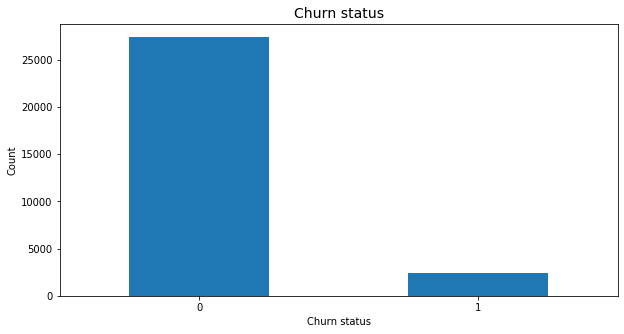

In [65]:
plt.figure(figsize=(10, 5))
churn_2['churn'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status', fontsize=14)
plt.xticks(rotation = 0)
plt.show()

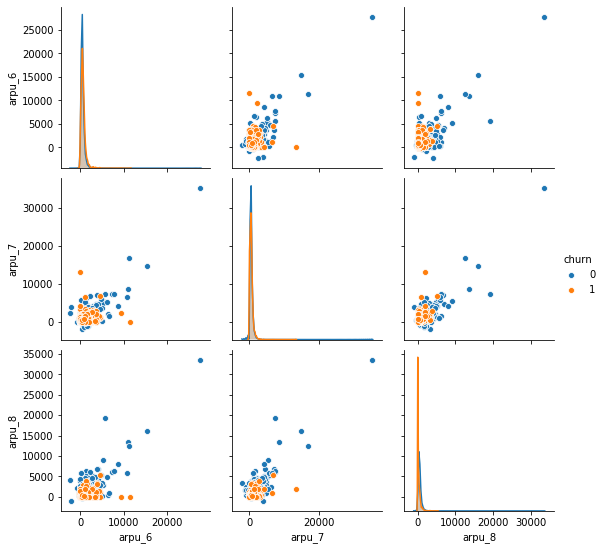

In [66]:
# arpu  ==> Average Revenue per user
sns.pairplot(churn_2[['arpu_6','arpu_7','arpu_8','churn']], hue='churn')

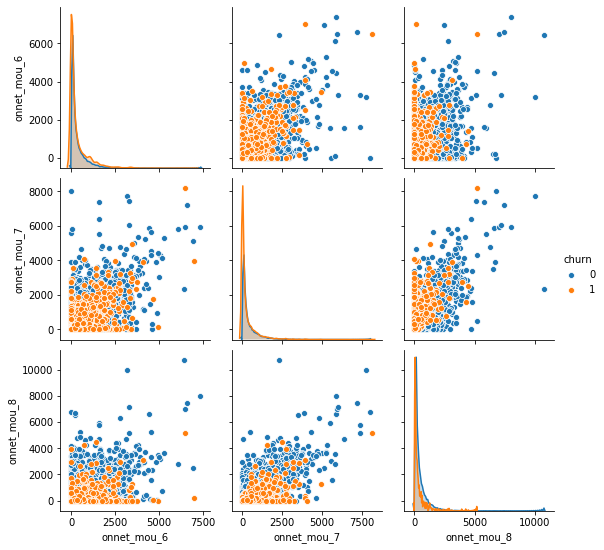

In [67]:
# onnet_mou ===> On network/ within the same network usage
sns.pairplot(churn_2[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']], hue='churn')


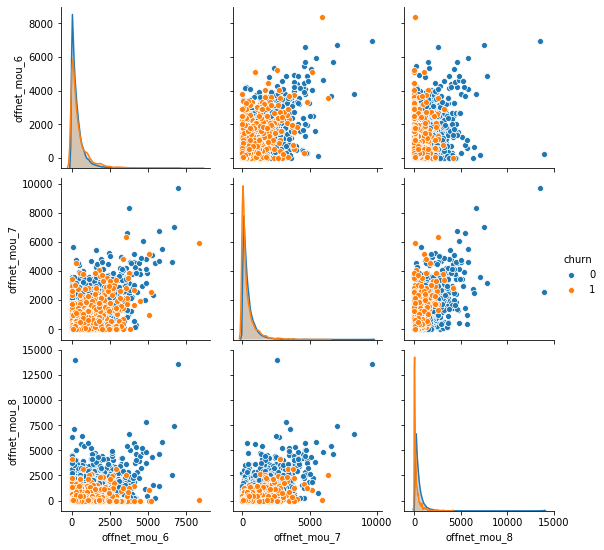

In [68]:
# Offnet_mou ===> Calls outside of the operator network
sns.pairplot(churn_2[['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'churn']], hue='churn')

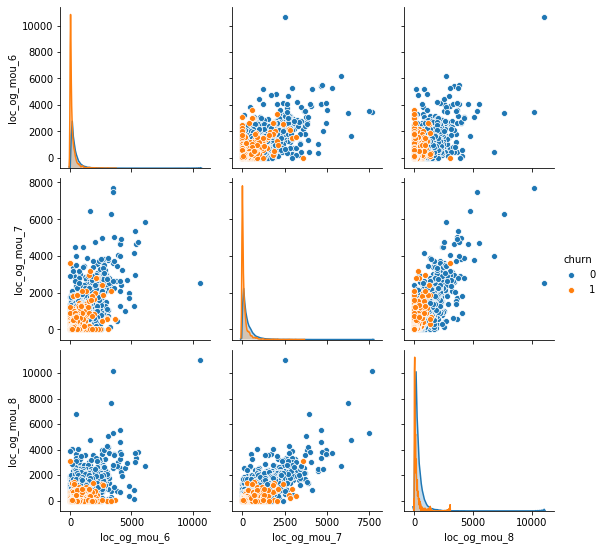

In [69]:
# loc_og_mou ====> within the circle outgoing calls
sns.pairplot(churn_2[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn']],hue='churn')

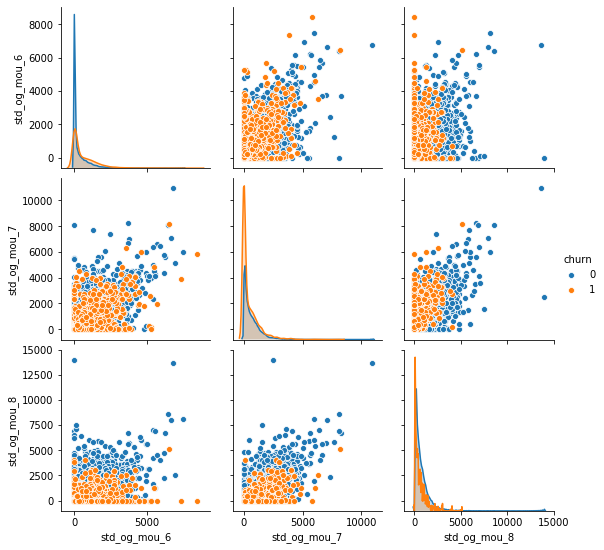

In [70]:
# std_og_mou ===> Outside calling circle/zone calls
sns.pairplot(churn_2[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn']],hue='churn')

In [71]:
# isd_og ====>  international calling
# sns.pairplot(churn_2[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','churn']],hue='churn')
# churn_2["isd_og_mou_6"].dtype

In [72]:
# churn_2['isd_og_mou_6'] = churn_2['isd_og_mou_6'].astype(float)

In [73]:
round(100 * (churn_2.isnull().sum() / len(churn_2.index)), 2)

mobile_number                0.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
onnet_mou_6                  0.0
onnet_mou_7                  0.0
onnet_mou_8                  0.0
offnet_mou_6                 0.0
offnet_mou_7                 0.0
offnet_mou_8                 0.0
roam_ic_mou_6                0.0
roam_ic_mou_7                0.0
roam_ic_mou_8                0.0
roam_og_mou_6                0.0
roam_og_mou_7                0.0
roam_og_mou_8                0.0
loc_og_t2t_mou_6             0.0
loc_og_t2t_mou_7             0.0
loc_og_t2t_mou_8             0.0
loc_og_t2m_mou_6             0.0
loc_og_t2m_mou_7             0.0
loc_og_t2m_mou_8             0.0
loc_og_t2f_mou_6             0.0
loc_og_t2f_mou_7             0.0
loc_og_t2f_mou_8             0.0
loc_og_t2c_mou_6             0.0
loc_og_t2c_mou_7             0.0
loc_og_t2c_mou_8             0.0
loc_og_mou_6                 0.0
loc_og_mou_7                 0.0
loc_og_mou

In [74]:
round(100 * (churn_2.isna().sum() / len(churn_2.index)), 2)

mobile_number                0.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
onnet_mou_6                  0.0
onnet_mou_7                  0.0
onnet_mou_8                  0.0
offnet_mou_6                 0.0
offnet_mou_7                 0.0
offnet_mou_8                 0.0
roam_ic_mou_6                0.0
roam_ic_mou_7                0.0
roam_ic_mou_8                0.0
roam_og_mou_6                0.0
roam_og_mou_7                0.0
roam_og_mou_8                0.0
loc_og_t2t_mou_6             0.0
loc_og_t2t_mou_7             0.0
loc_og_t2t_mou_8             0.0
loc_og_t2m_mou_6             0.0
loc_og_t2m_mou_7             0.0
loc_og_t2m_mou_8             0.0
loc_og_t2f_mou_6             0.0
loc_og_t2f_mou_7             0.0
loc_og_t2f_mou_8             0.0
loc_og_t2c_mou_6             0.0
loc_og_t2c_mou_7             0.0
loc_og_t2c_mou_8             0.0
loc_og_mou_6                 0.0
loc_og_mou_7                 0.0
loc_og_mou

In [75]:
missing_values_columns = []

for col in list(churn_2.columns):
    if round(100*(churn_2[col].isnull().sum()/churn_2.shape[0]), 10) > 0:
        missing_values_columns.append(col)

missing_values_columns
# for col in missing_values_columns:
#     churn_2[col].fillna(0, inplace = True)

[]

In [76]:
round(100 * (churn_2.isna().sum() / len(churn_2.index)), 2)

mobile_number                0.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
onnet_mou_6                  0.0
onnet_mou_7                  0.0
onnet_mou_8                  0.0
offnet_mou_6                 0.0
offnet_mou_7                 0.0
offnet_mou_8                 0.0
roam_ic_mou_6                0.0
roam_ic_mou_7                0.0
roam_ic_mou_8                0.0
roam_og_mou_6                0.0
roam_og_mou_7                0.0
roam_og_mou_8                0.0
loc_og_t2t_mou_6             0.0
loc_og_t2t_mou_7             0.0
loc_og_t2t_mou_8             0.0
loc_og_t2m_mou_6             0.0
loc_og_t2m_mou_7             0.0
loc_og_t2m_mou_8             0.0
loc_og_t2f_mou_6             0.0
loc_og_t2f_mou_7             0.0
loc_og_t2f_mou_8             0.0
loc_og_t2c_mou_6             0.0
loc_og_t2c_mou_7             0.0
loc_og_t2c_mou_8             0.0
loc_og_mou_6                 0.0
loc_og_mou_7                 0.0
loc_og_mou

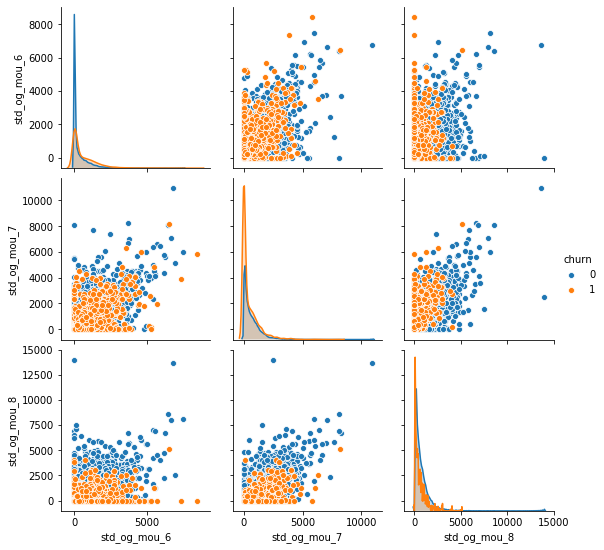

In [77]:
# std_og_mou ===> Outside calling circle/zone calls

sns.pairplot(churn_2[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn']],hue='churn')

In [78]:
# isd_og ===> international calling

# sns.pairplot(churn_2[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','churn']],hue='churn')

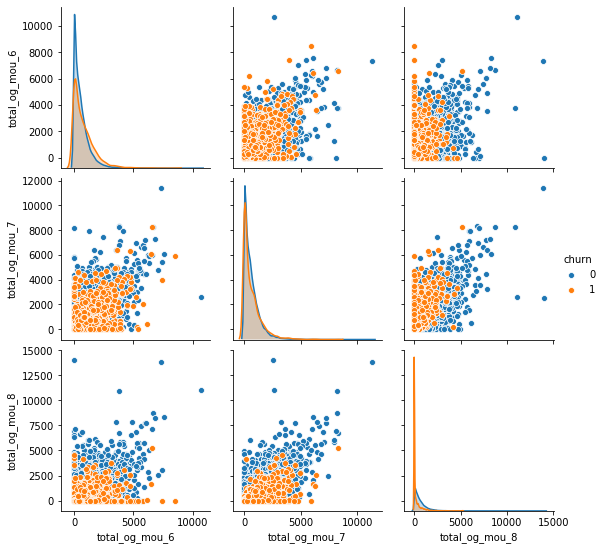

In [79]:
# totalog ===> All outgoing calls by the customer
sns.pairplot(churn_2[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']],hue='churn')

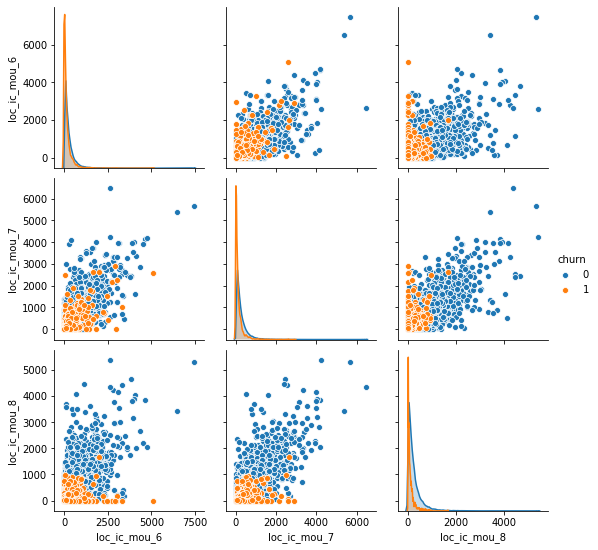

In [80]:
# locic ===> incoming local calls

sns.pairplot(churn_2[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn']],hue='churn')

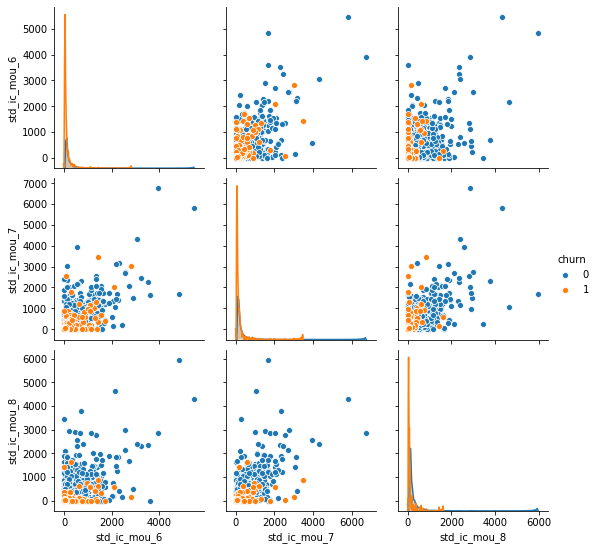

In [81]:
# stdic ====> Outside circle incoming calls
sns.pairplot(churn_2[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn']],hue='churn')

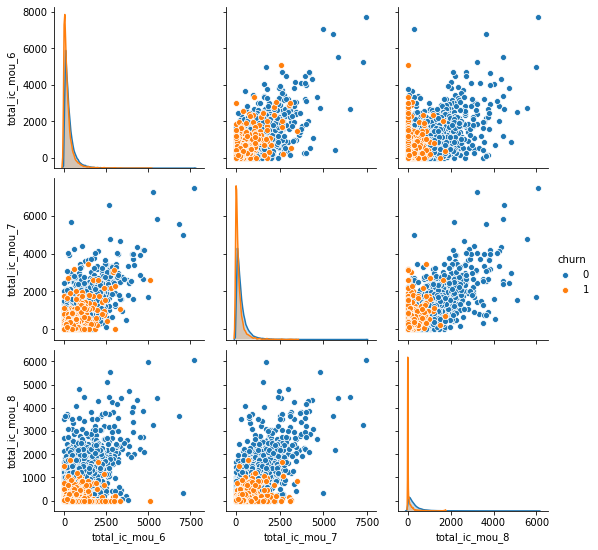

In [82]:
# totalic ===> All incoming calls received by a person

sns.pairplot(churn_2[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn']],hue='churn')

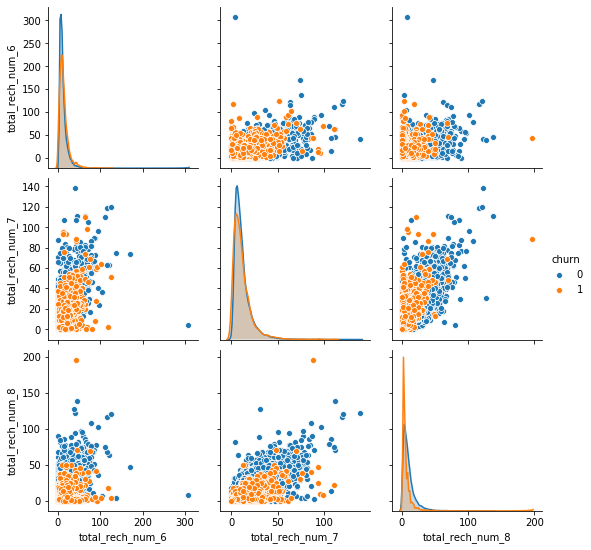

In [83]:
# total_rechnum ====> Number of times a subscriber recharged his mobile
sns.pairplot(churn_2[['total_rech_num_6','total_rech_num_7','total_rech_num_8','churn']],hue='churn')

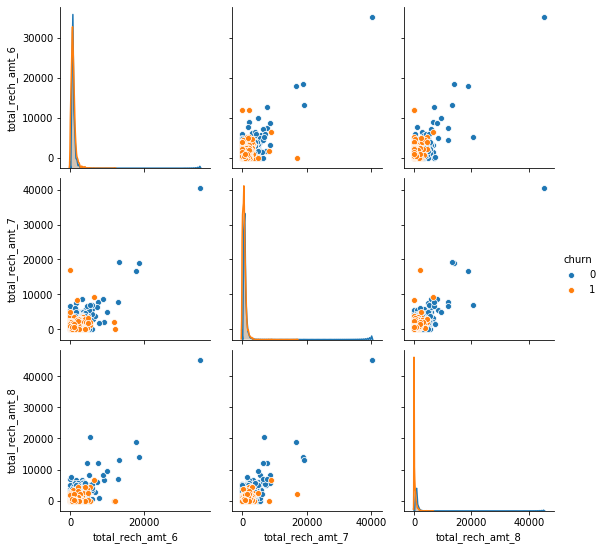

In [84]:
# total_rechamt ===> Total recharge amount in a particular month

sns.pairplot(churn_2[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','churn']],hue='churn')


In [85]:
# total_rechdata ===> Total number of times mobile data has been recharged

# sns.pairplot(churn_2[['total_rech_data_6','total_rech_data_7','total_rech_data_8','churn']],hue='churn')

In [86]:
# vol_2gmb  ==> Internet usage in MB

# sns.pairplot(churn_2[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','churn']],hue='churn')

In [87]:
# vol_3gmb ===> Internet usage in MB

# sns.pairplot(churn_2[['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','churn']],hue='churn')

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

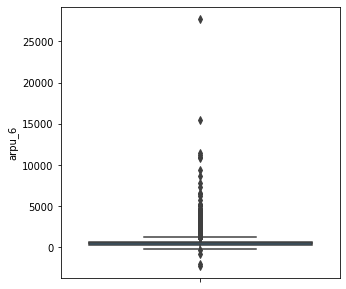

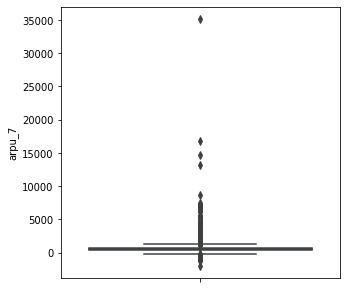

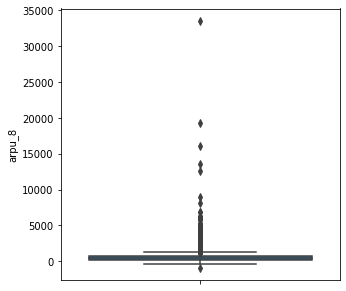

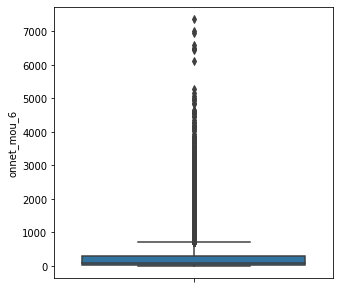

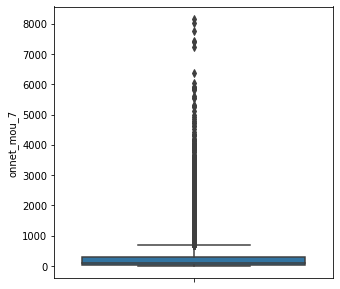

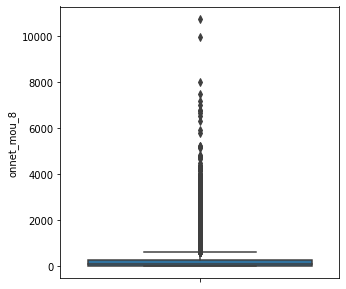

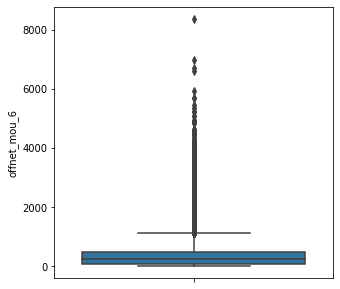

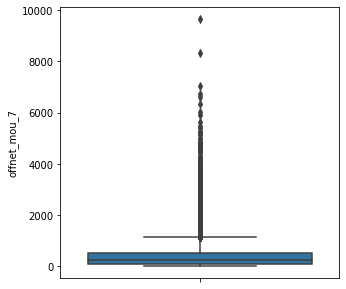

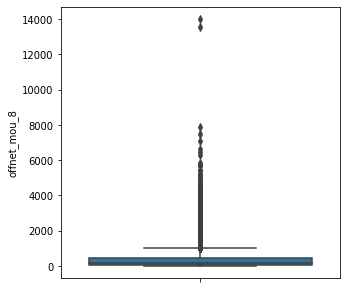

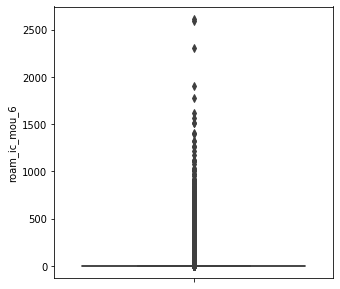

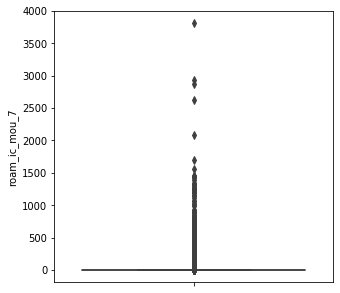

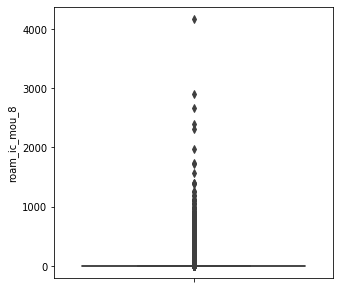

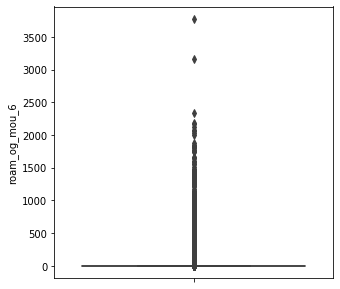

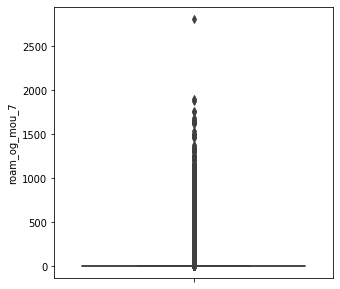

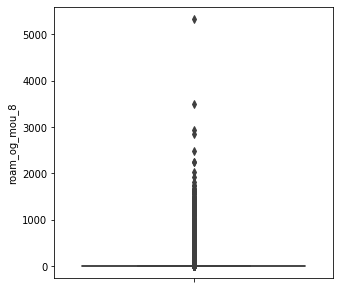

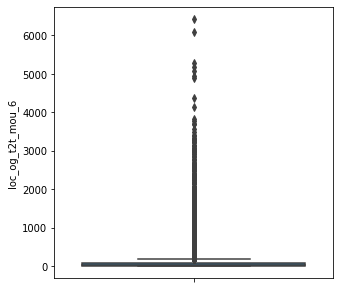

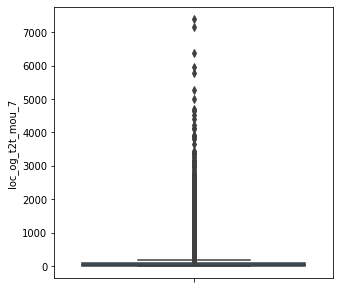

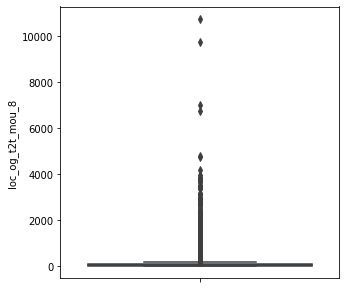

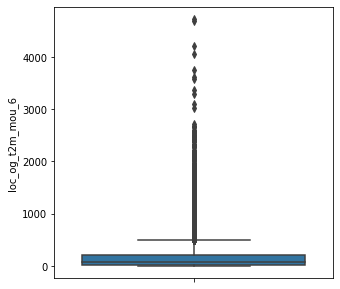

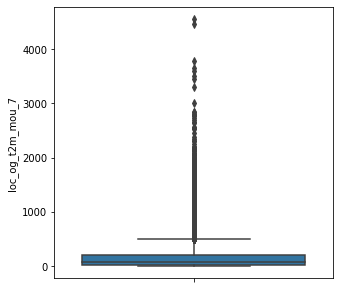

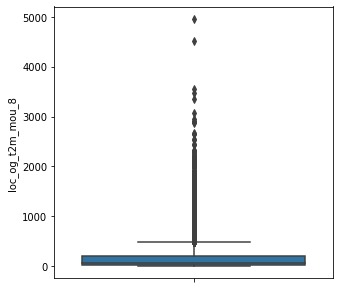

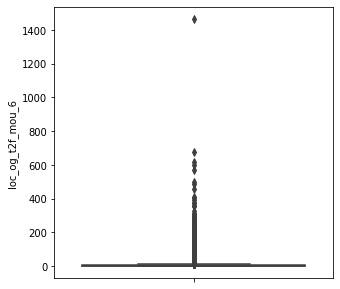

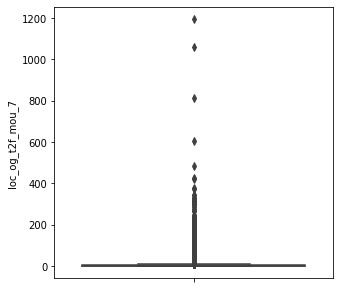

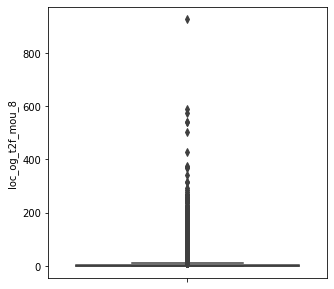

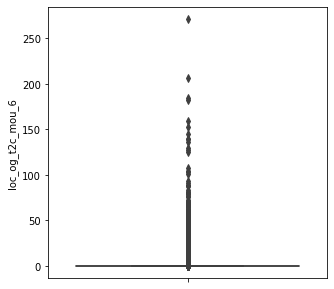

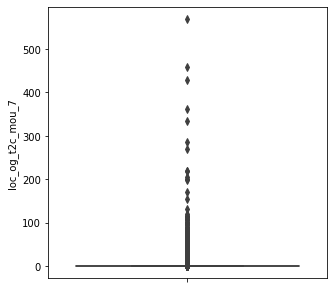

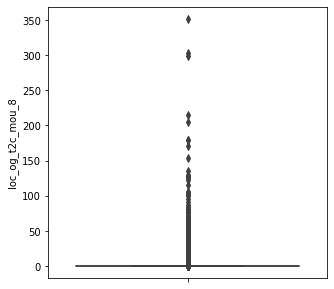

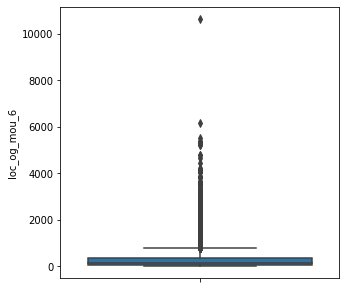

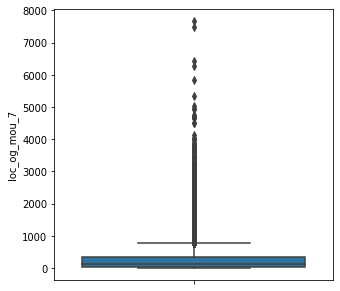

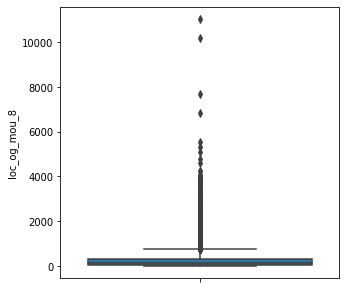

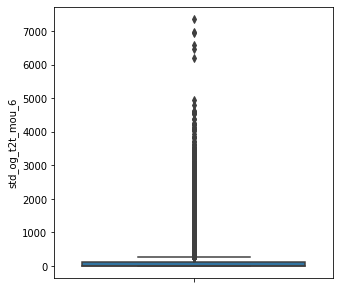

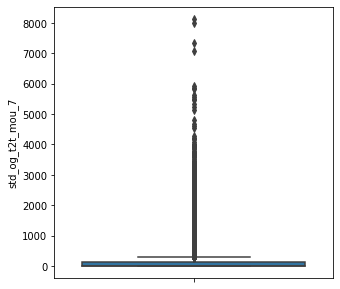

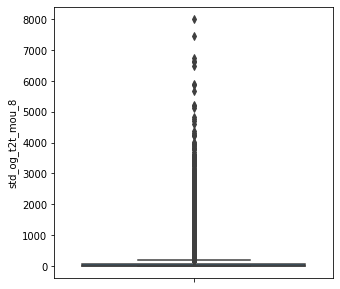

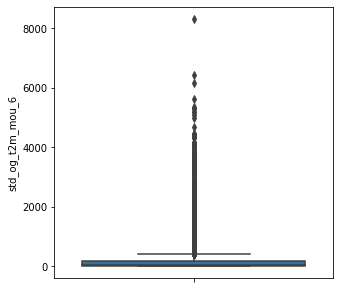

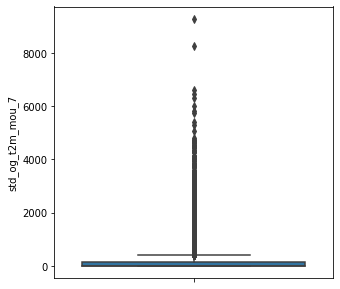

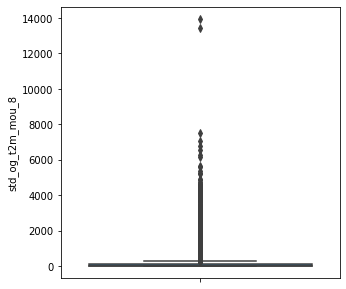

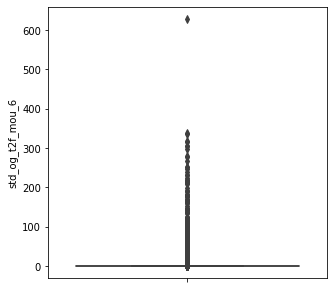

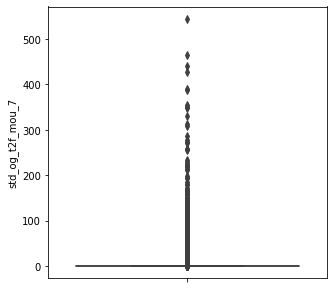

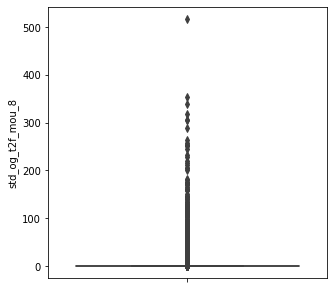

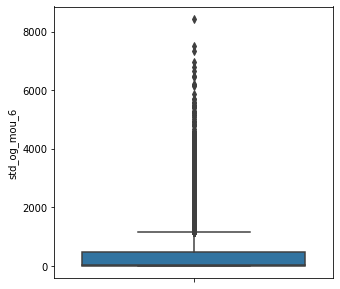

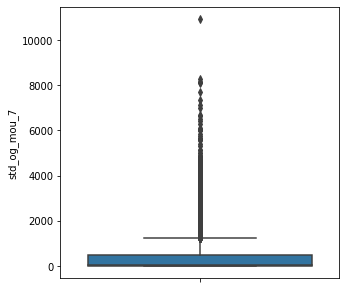

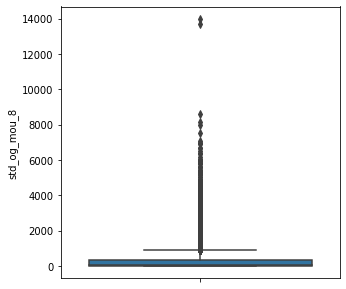

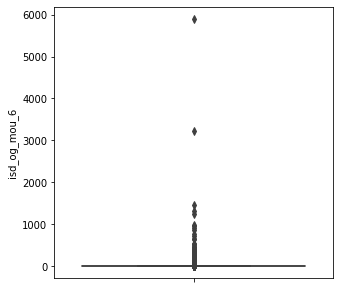

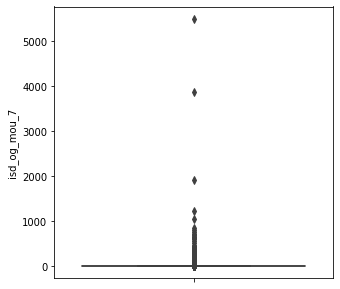

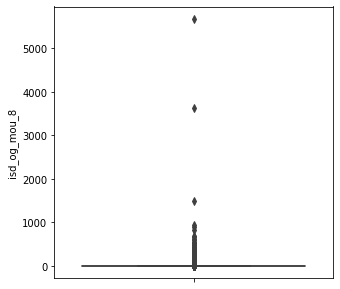

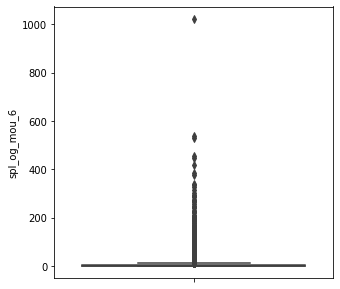

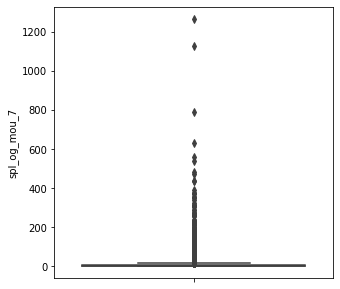

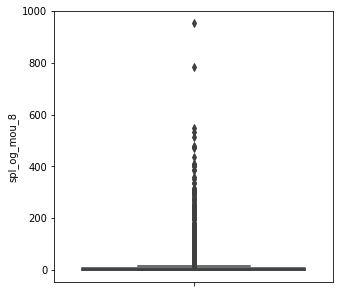

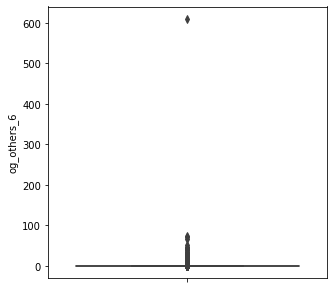

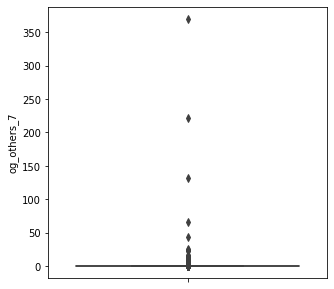

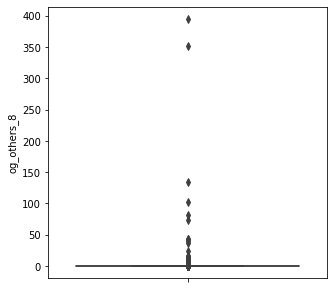

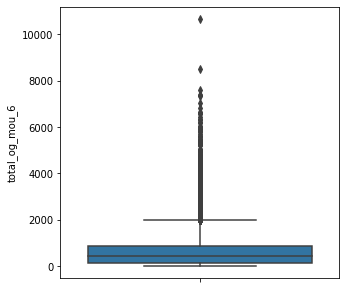

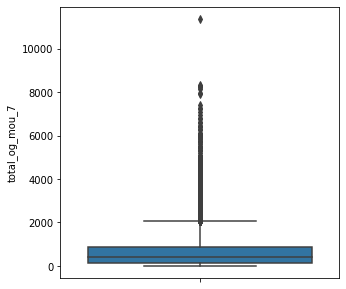

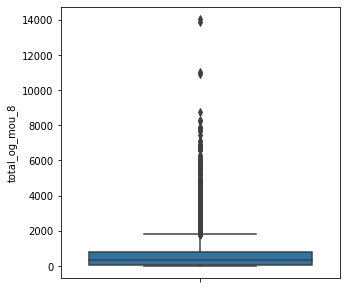

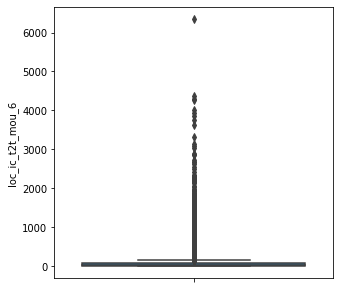

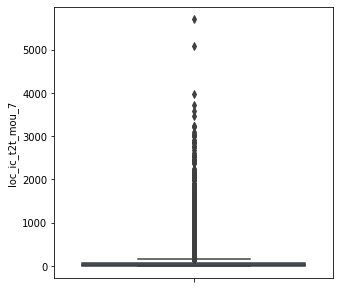

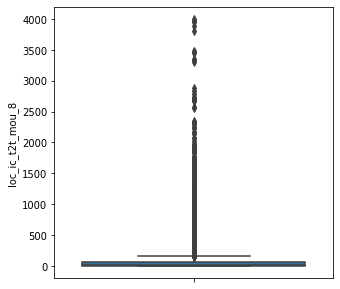

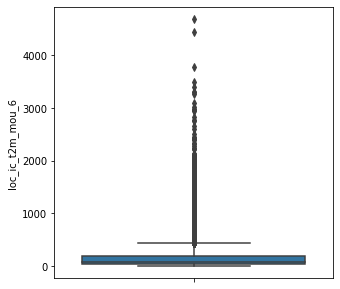

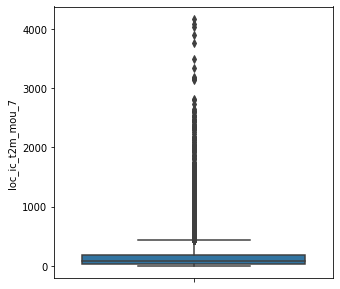

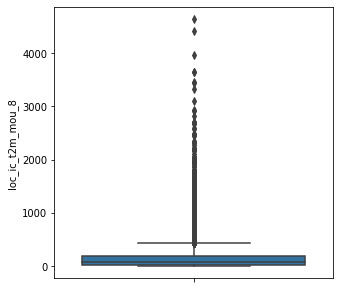

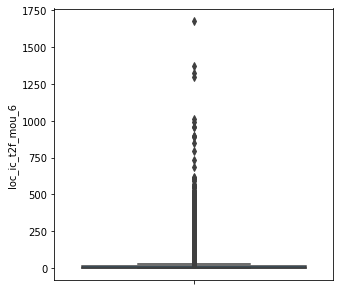

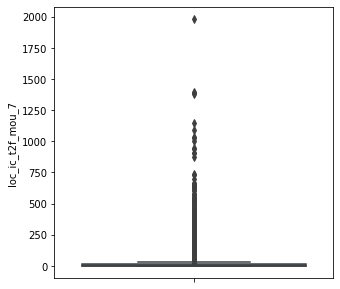

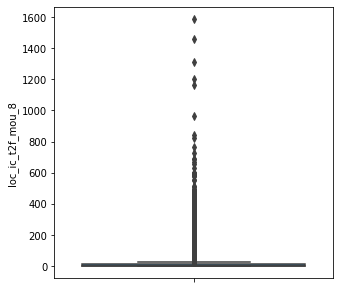

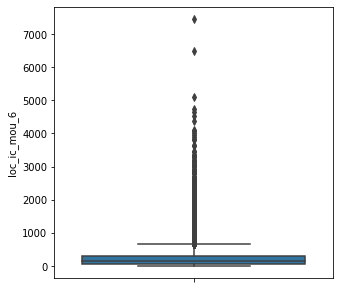

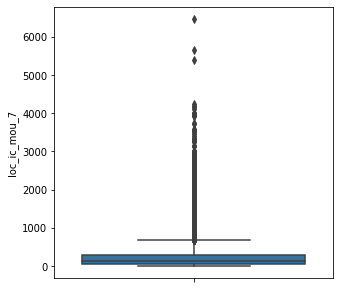

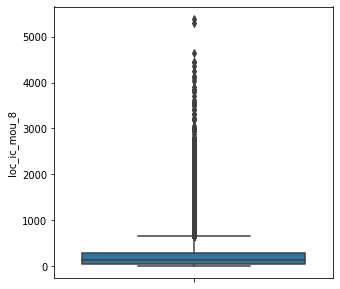

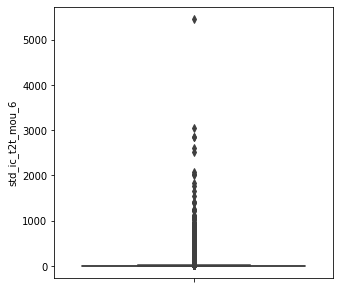

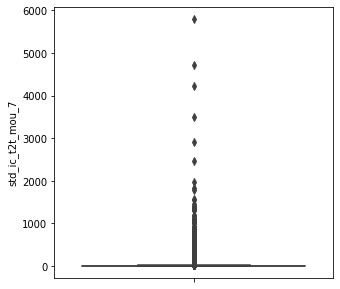

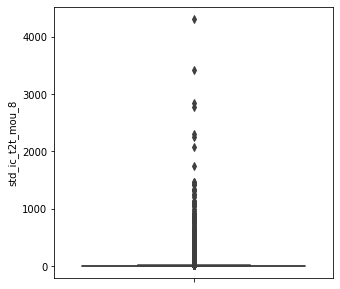

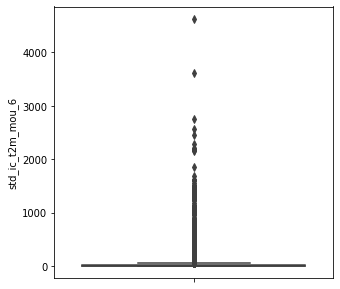

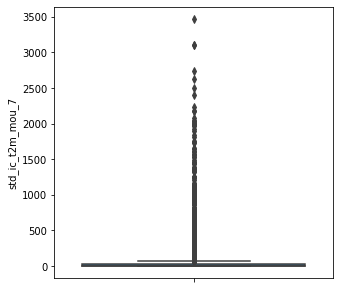

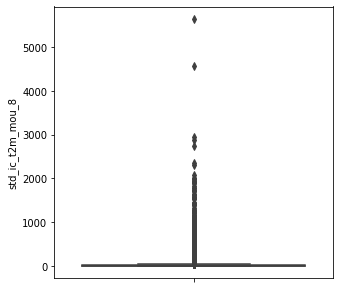

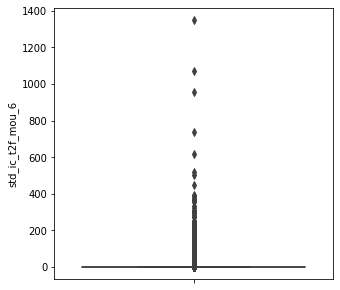

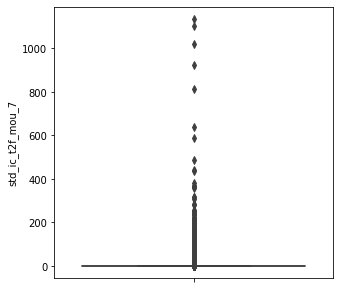

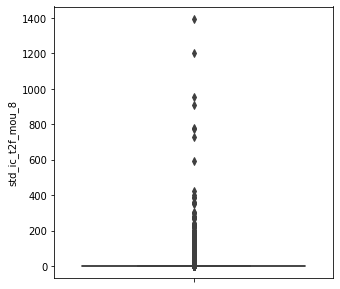

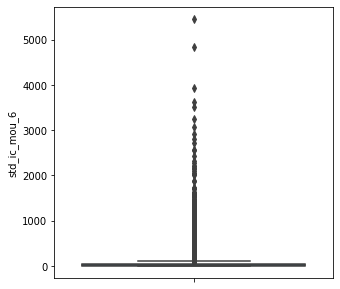

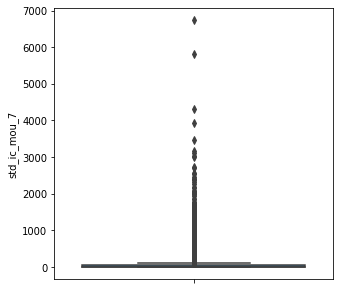

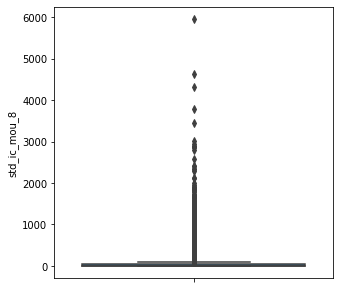

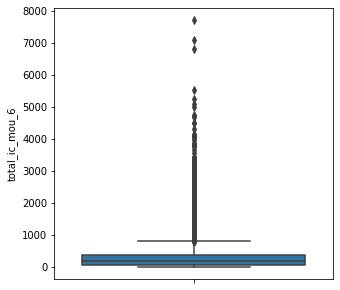

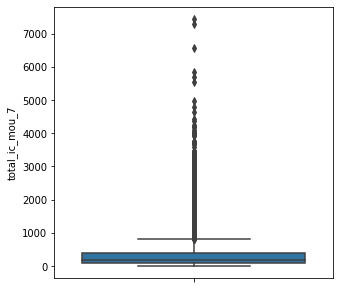

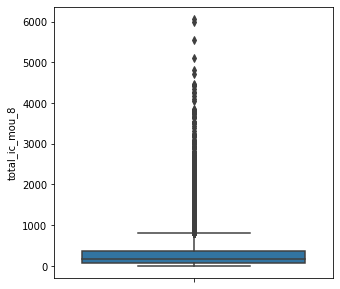

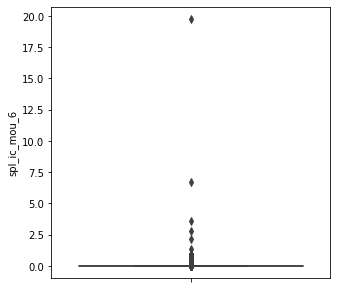

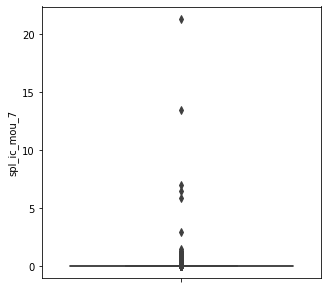

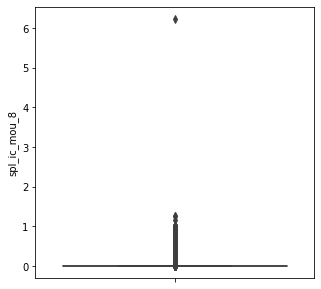

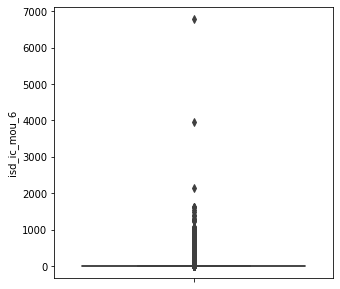

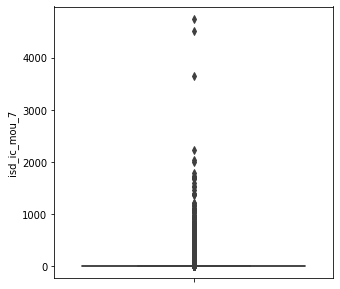

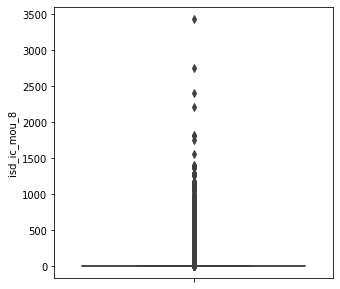

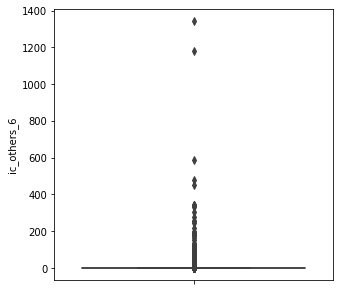

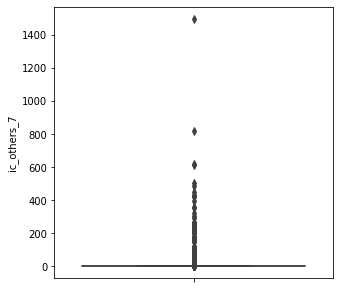

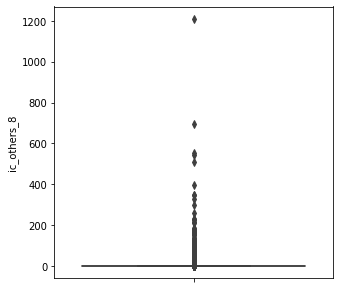

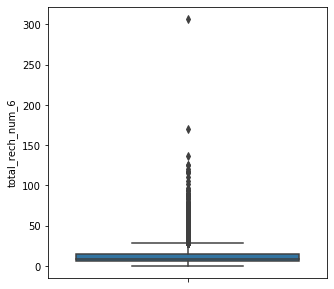

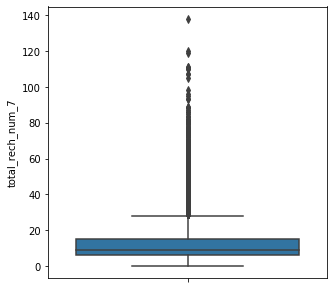

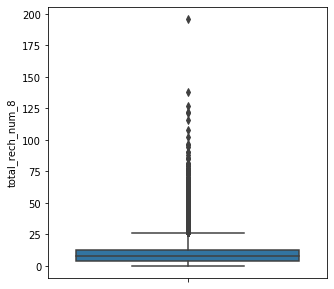

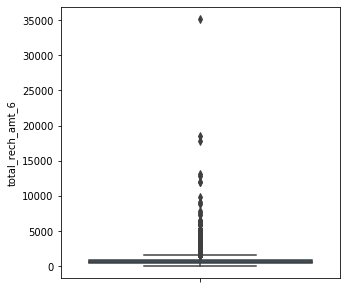

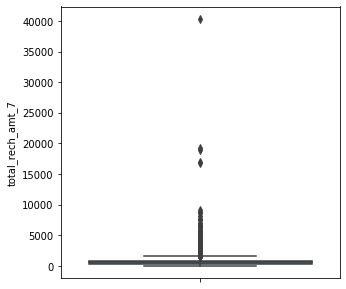

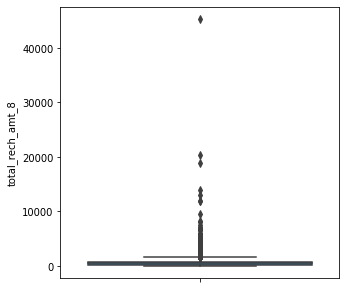

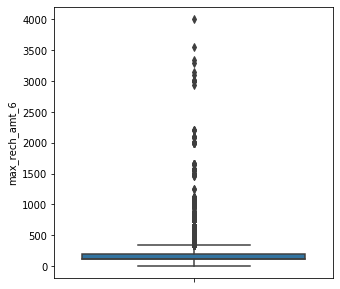

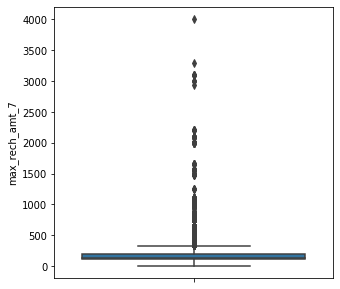

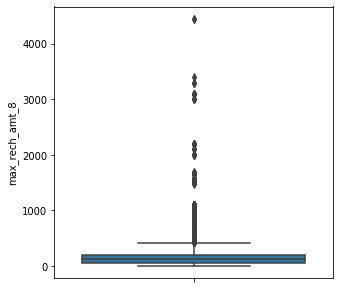

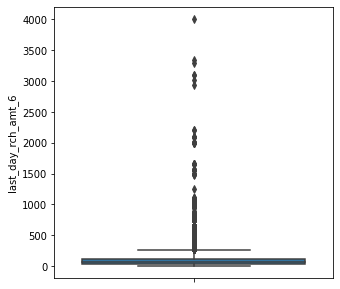

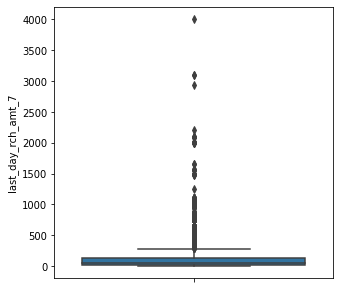

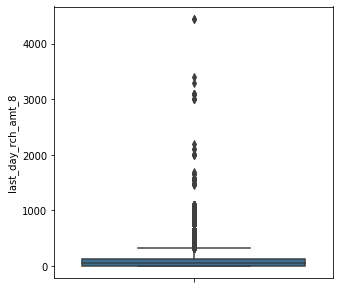

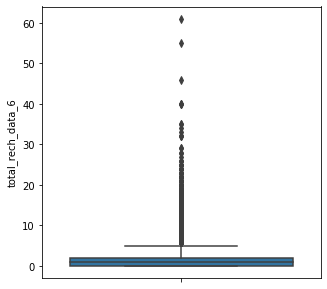

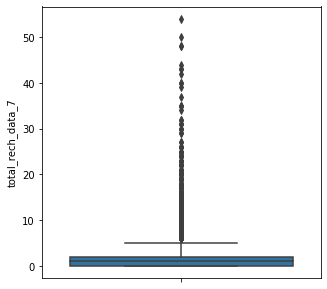

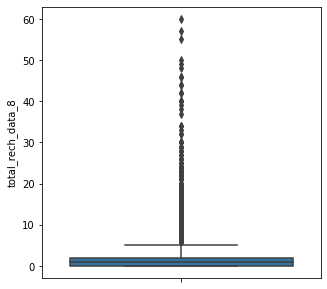

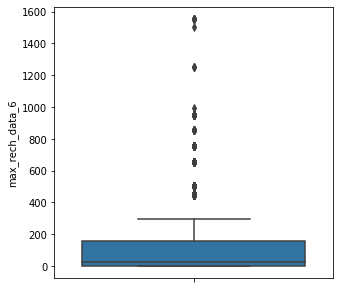

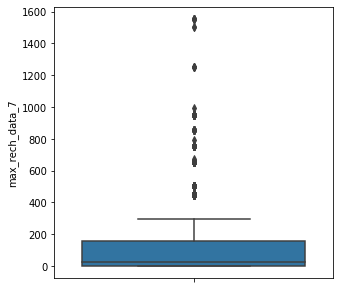

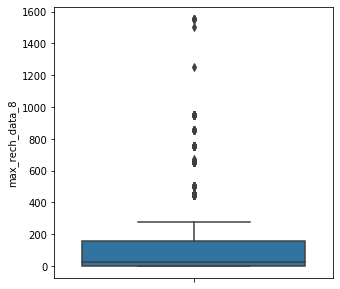

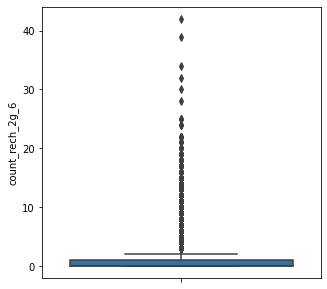

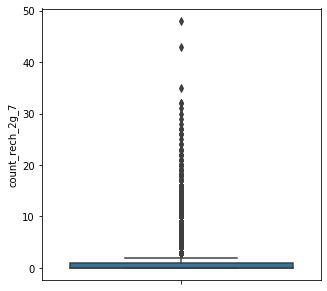

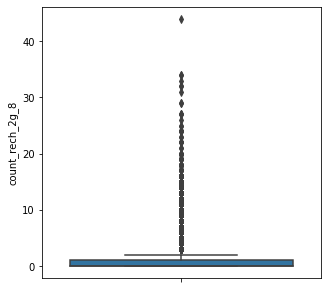

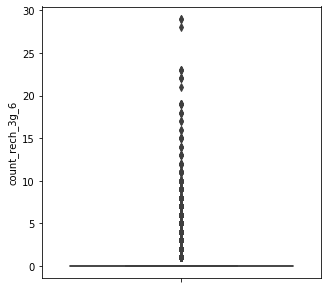

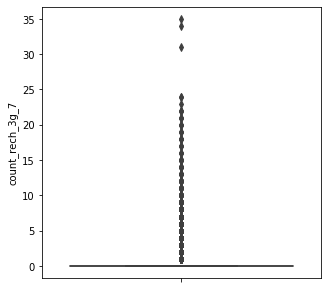

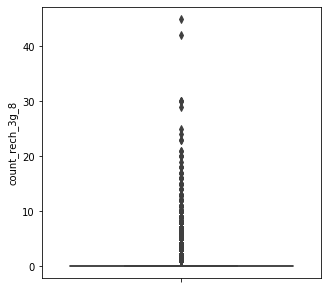

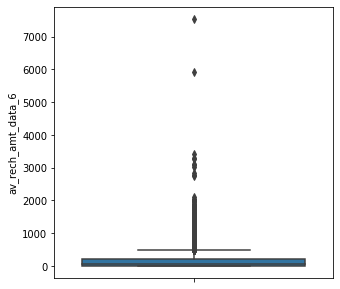

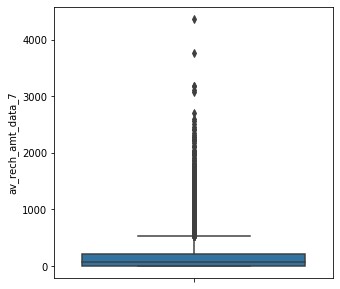

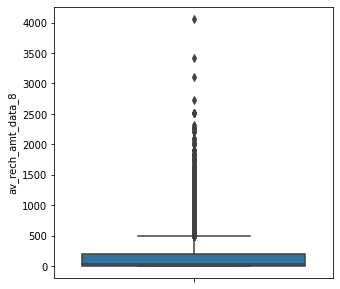

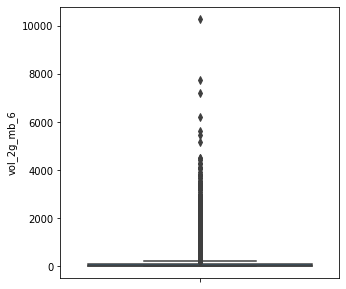

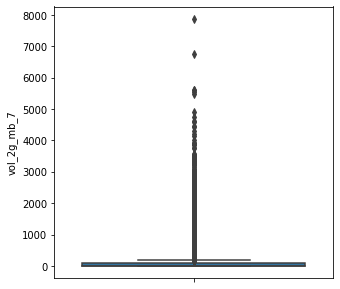

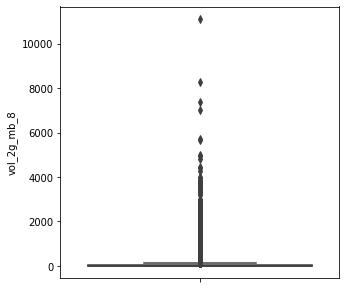

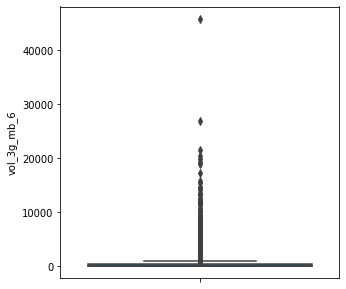

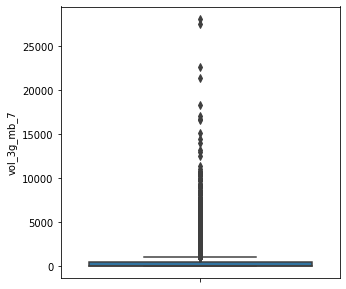

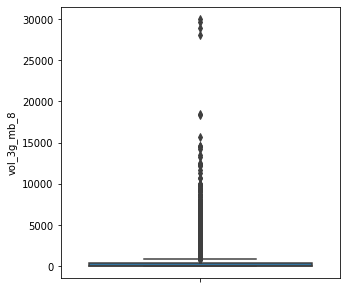

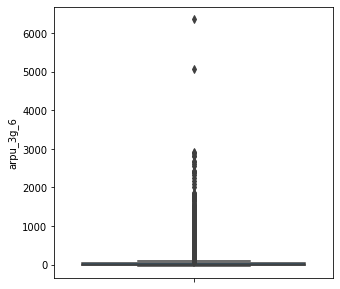

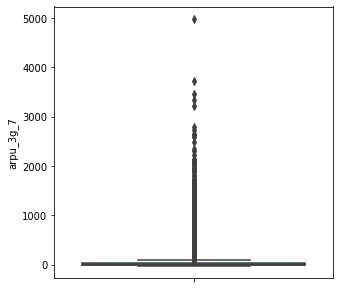

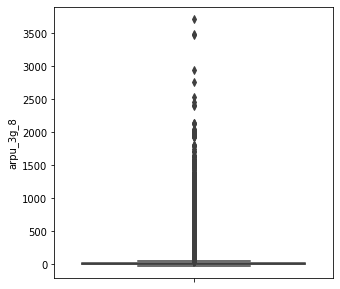

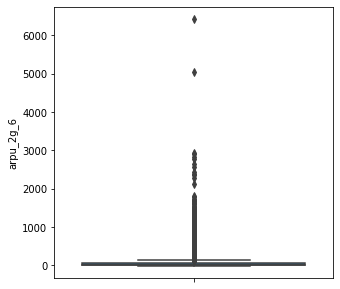

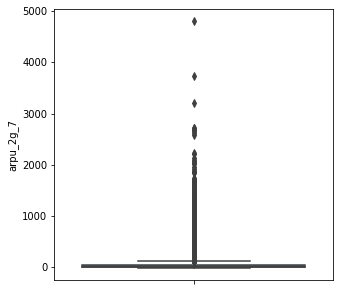

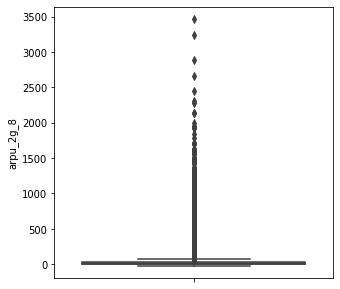

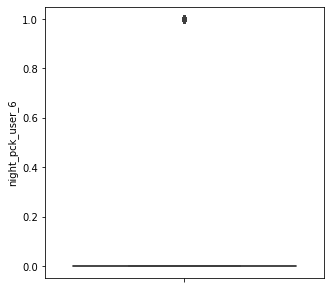

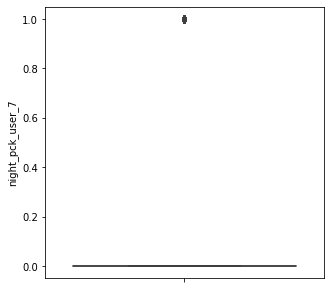

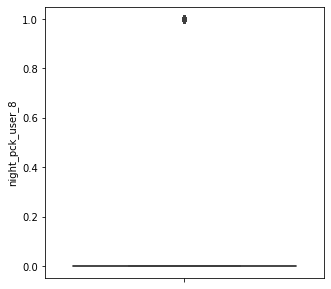

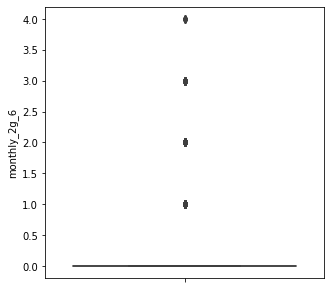

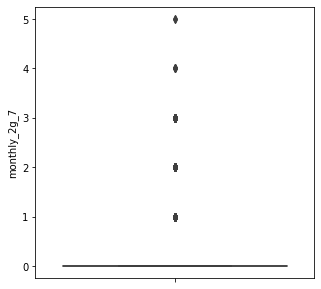

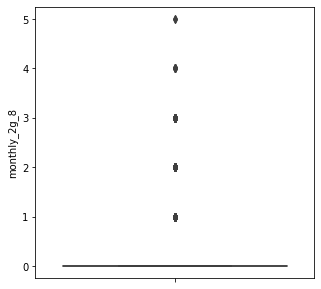

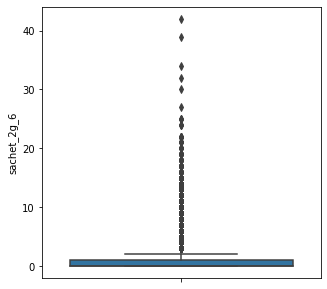

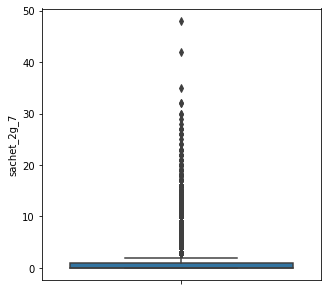

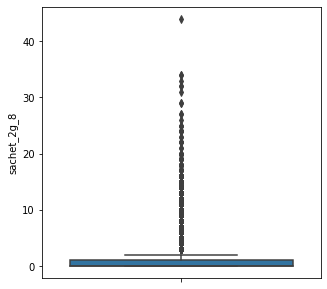

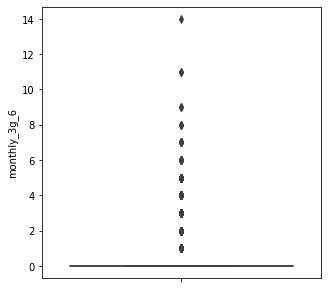

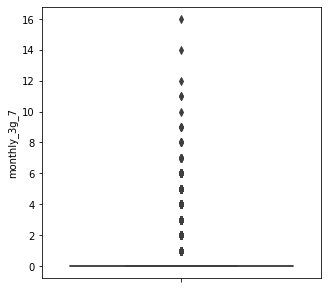

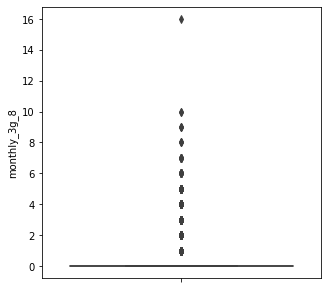

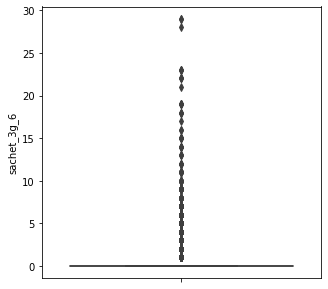

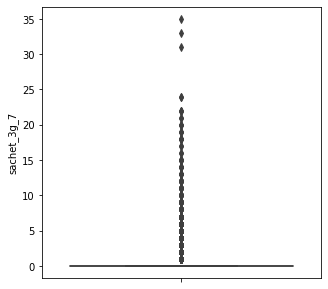

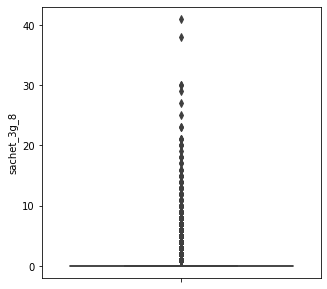

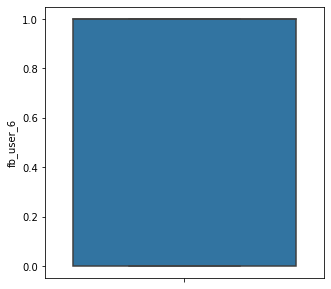

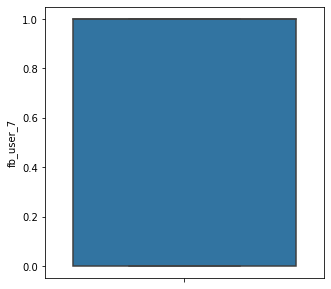

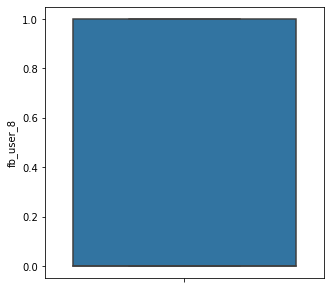

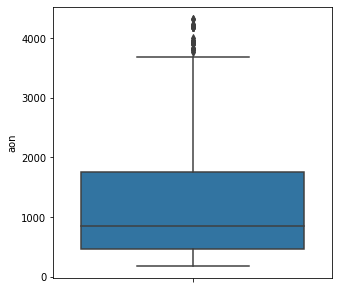

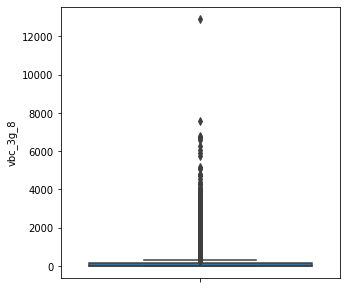

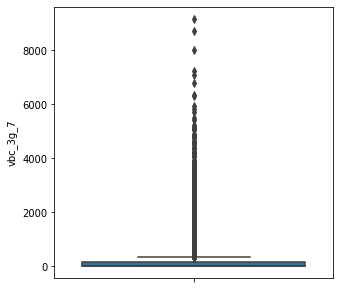

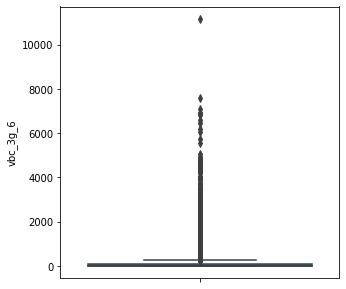

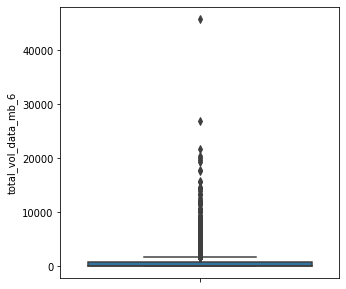

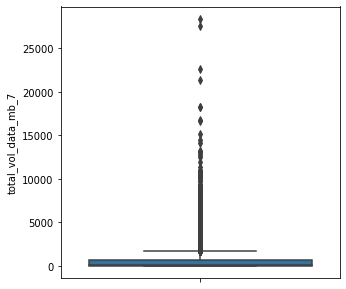

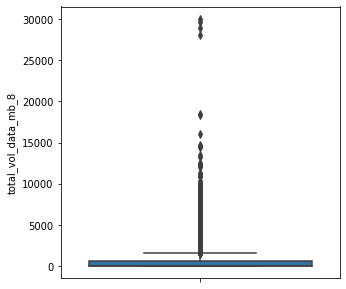

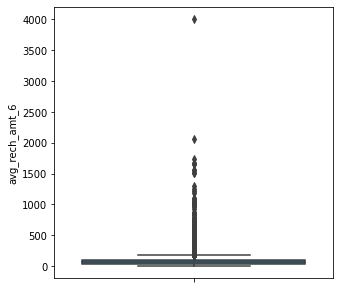

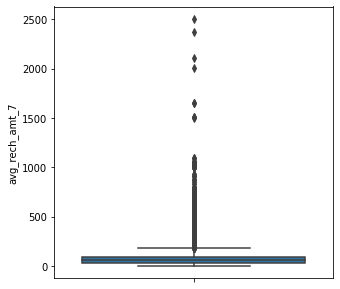

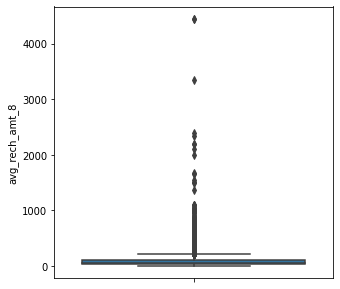

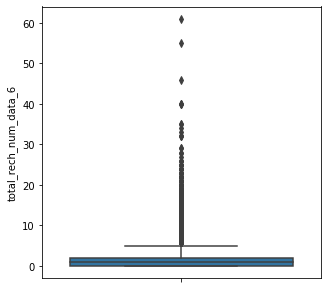

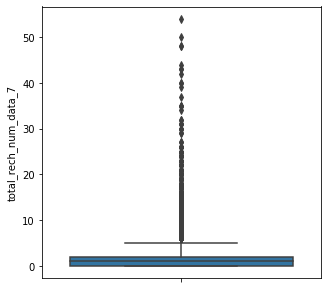

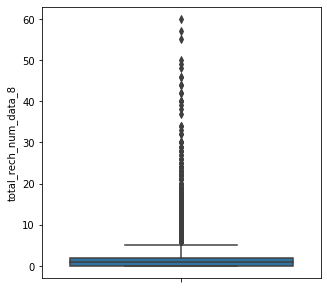

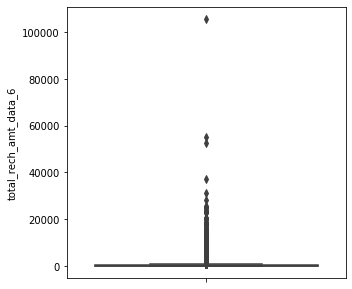

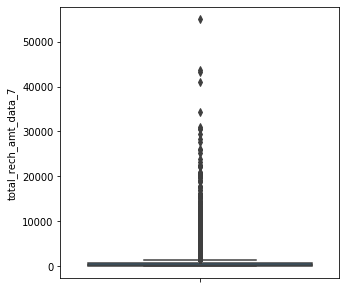

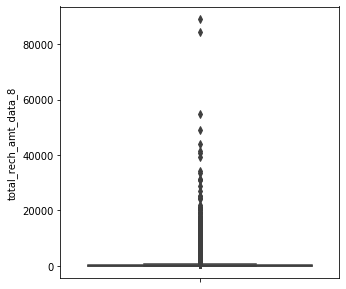

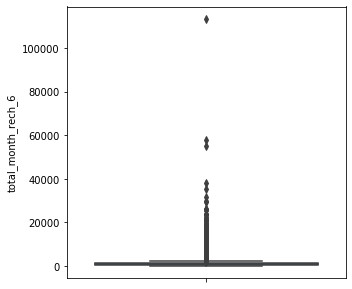

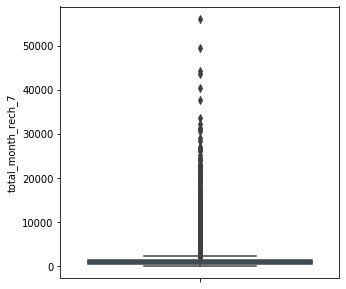

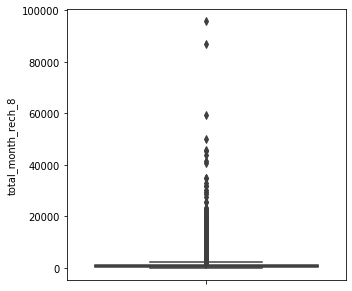

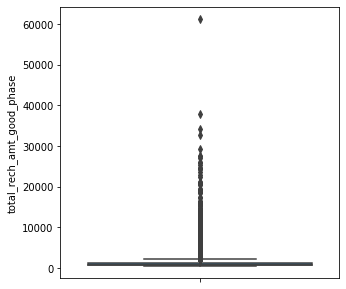

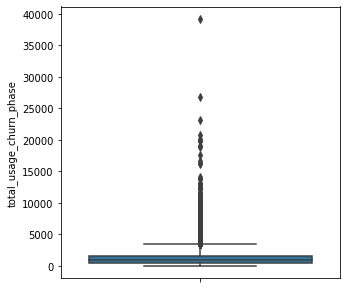

In [89]:
columns = [col for col in churn_2.columns if col not in ['churn','mobile_number']]

columns.remove("date_of_last_rech_6")
columns.remove("date_of_last_rech_7")
columns.remove("date_of_last_rech_8")

# columns.remove("date_of_last_rech_9")

for col in columns:
    print("\nCOLUMN ", col, "\n")
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=col, data=churn_2)


COLUMN  arpu_6 



<Figure size 360x360 with 0 Axes>

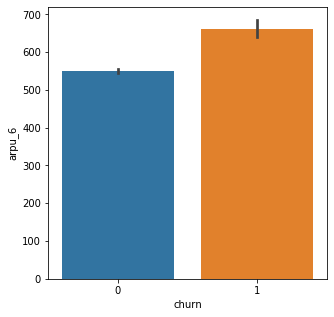


COLUMN  arpu_7 



<Figure size 360x360 with 0 Axes>

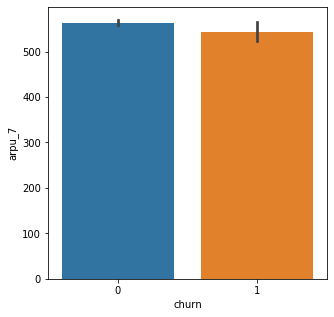


COLUMN  arpu_8 



<Figure size 360x360 with 0 Axes>

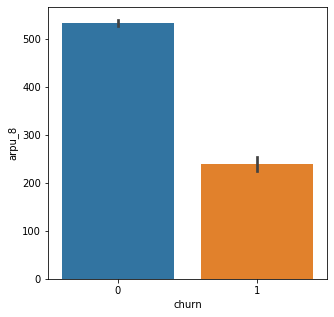


COLUMN  onnet_mou_6 



<Figure size 360x360 with 0 Axes>

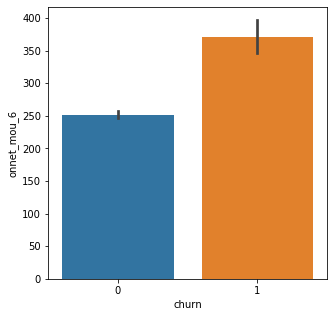


COLUMN  onnet_mou_7 



<Figure size 360x360 with 0 Axes>

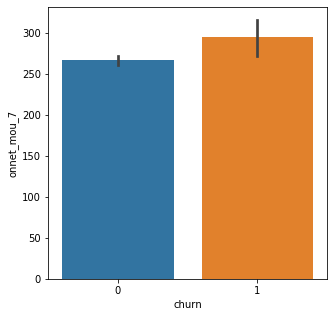


COLUMN  onnet_mou_8 



<Figure size 360x360 with 0 Axes>

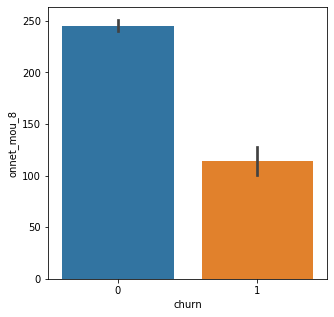


COLUMN  offnet_mou_6 



<Figure size 360x360 with 0 Axes>

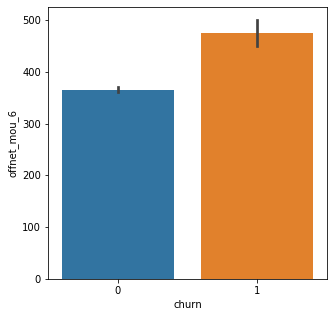


COLUMN  offnet_mou_7 



<Figure size 360x360 with 0 Axes>

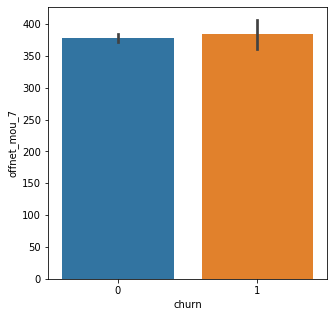


COLUMN  offnet_mou_8 



<Figure size 360x360 with 0 Axes>

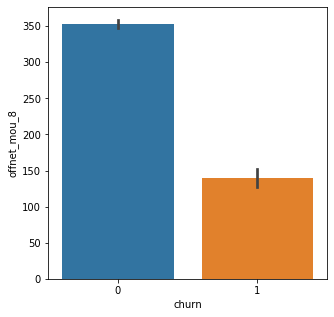


COLUMN  roam_ic_mou_6 



<Figure size 360x360 with 0 Axes>

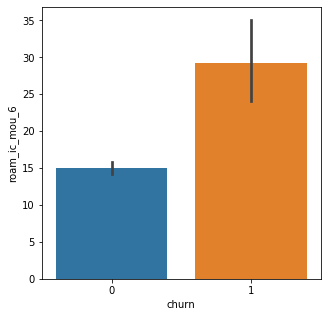


COLUMN  roam_ic_mou_7 



<Figure size 360x360 with 0 Axes>

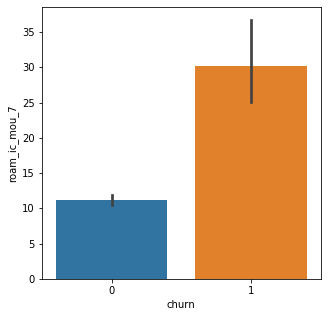


COLUMN  roam_ic_mou_8 



<Figure size 360x360 with 0 Axes>

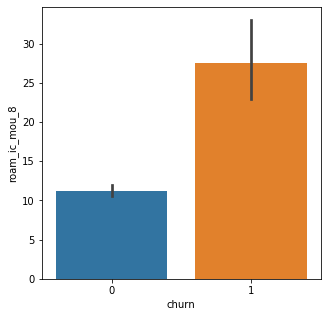


COLUMN  roam_og_mou_6 



<Figure size 360x360 with 0 Axes>

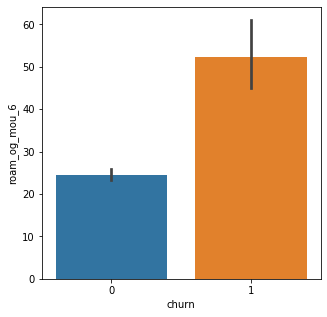


COLUMN  roam_og_mou_7 



<Figure size 360x360 with 0 Axes>

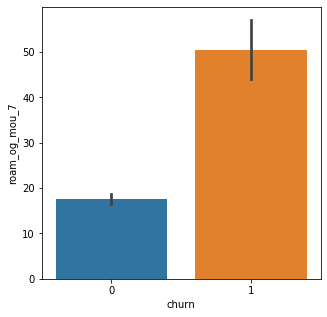


COLUMN  roam_og_mou_8 



<Figure size 360x360 with 0 Axes>

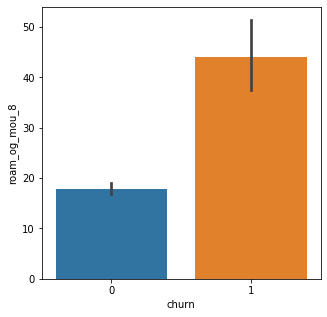


COLUMN  loc_og_t2t_mou_6 



<Figure size 360x360 with 0 Axes>

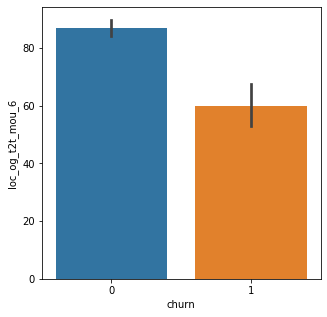


COLUMN  loc_og_t2t_mou_7 



<Figure size 360x360 with 0 Axes>

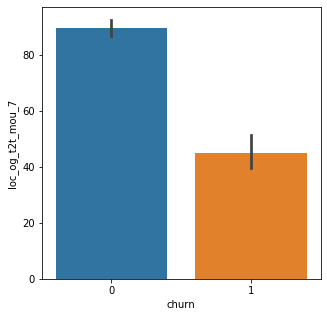


COLUMN  loc_og_t2t_mou_8 



<Figure size 360x360 with 0 Axes>

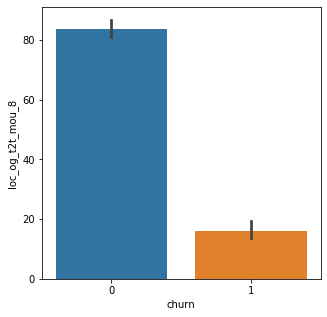


COLUMN  loc_og_t2m_mou_6 



<Figure size 360x360 with 0 Axes>

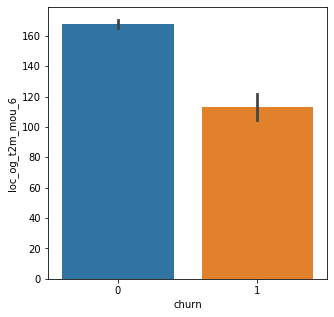


COLUMN  loc_og_t2m_mou_7 



<Figure size 360x360 with 0 Axes>

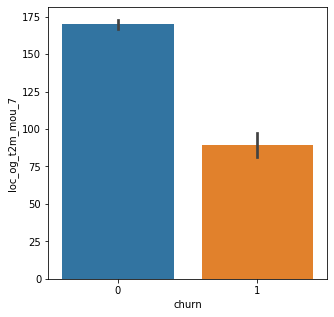


COLUMN  loc_og_t2m_mou_8 



<Figure size 360x360 with 0 Axes>

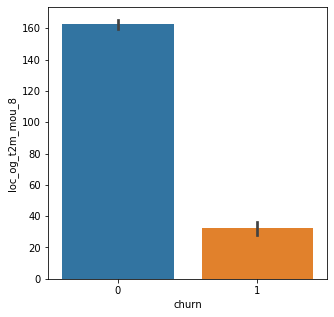


COLUMN  loc_og_t2f_mou_6 



<Figure size 360x360 with 0 Axes>

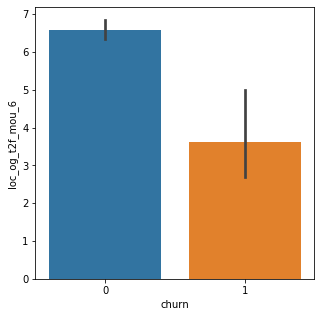


COLUMN  loc_og_t2f_mou_7 



<Figure size 360x360 with 0 Axes>

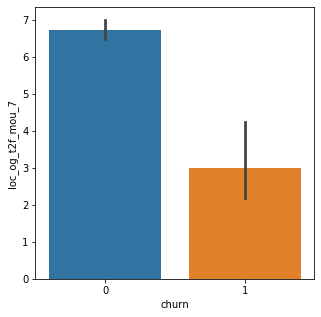


COLUMN  loc_og_t2f_mou_8 



<Figure size 360x360 with 0 Axes>

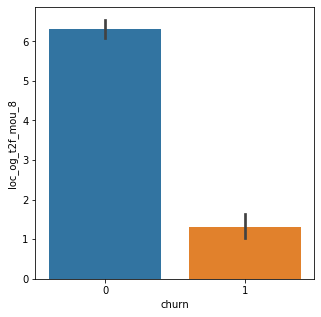


COLUMN  loc_og_t2c_mou_6 



<Figure size 360x360 with 0 Axes>

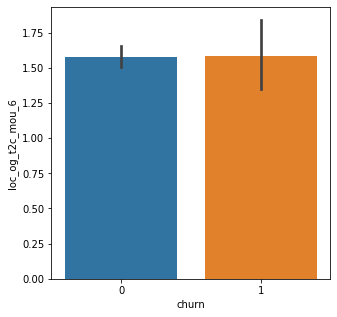


COLUMN  loc_og_t2c_mou_7 



<Figure size 360x360 with 0 Axes>

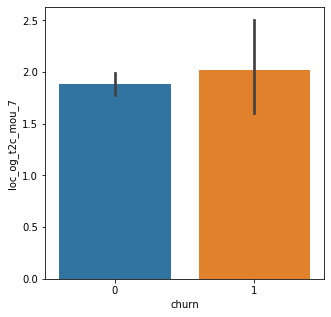


COLUMN  loc_og_t2c_mou_8 



<Figure size 360x360 with 0 Axes>

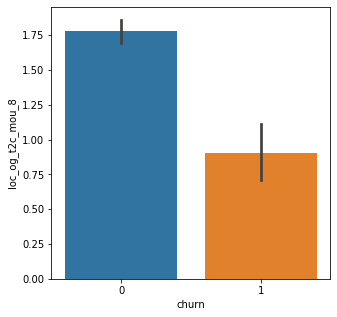


COLUMN  loc_og_mou_6 



<Figure size 360x360 with 0 Axes>

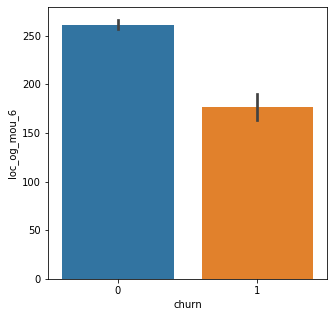


COLUMN  loc_og_mou_7 



<Figure size 360x360 with 0 Axes>

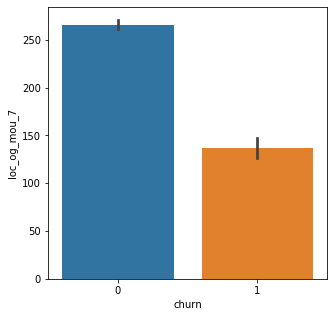


COLUMN  loc_og_mou_8 



<Figure size 360x360 with 0 Axes>

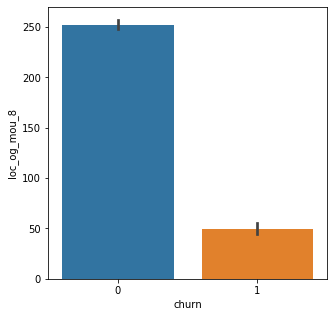


COLUMN  std_og_t2t_mou_6 



<Figure size 360x360 with 0 Axes>

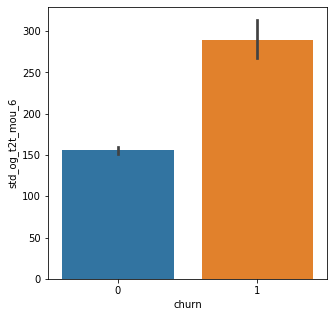


COLUMN  std_og_t2t_mou_7 



<Figure size 360x360 with 0 Axes>

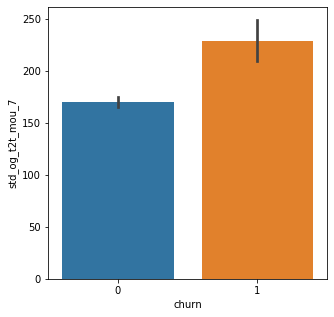


COLUMN  std_og_t2t_mou_8 



<Figure size 360x360 with 0 Axes>

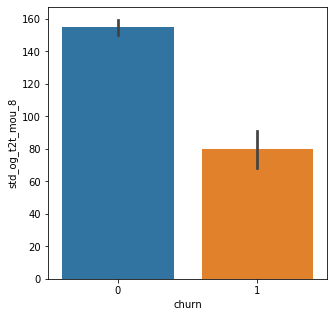


COLUMN  std_og_t2m_mou_6 



<Figure size 360x360 with 0 Axes>

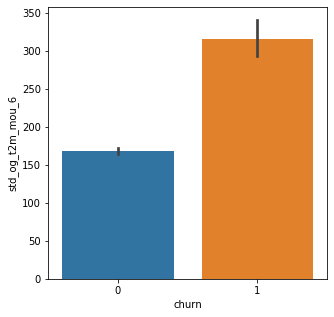


COLUMN  std_og_t2m_mou_7 



<Figure size 360x360 with 0 Axes>

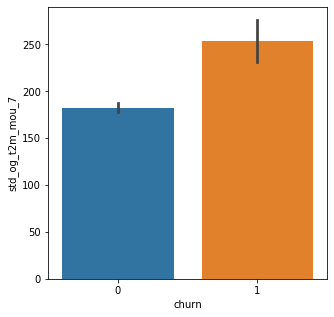


COLUMN  std_og_t2m_mou_8 



<Figure size 360x360 with 0 Axes>

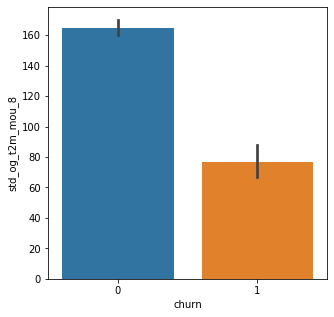


COLUMN  std_og_t2f_mou_6 



<Figure size 360x360 with 0 Axes>

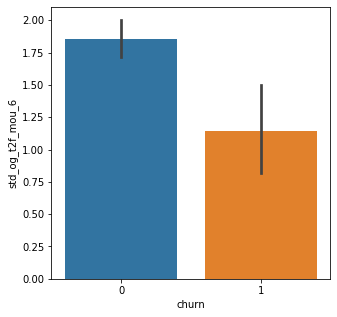


COLUMN  std_og_t2f_mou_7 



<Figure size 360x360 with 0 Axes>

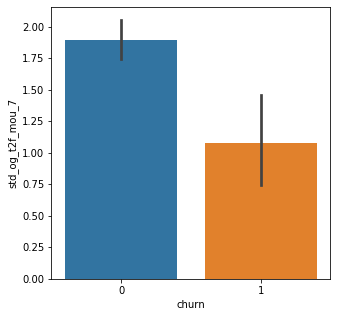


COLUMN  std_og_t2f_mou_8 



<Figure size 360x360 with 0 Axes>

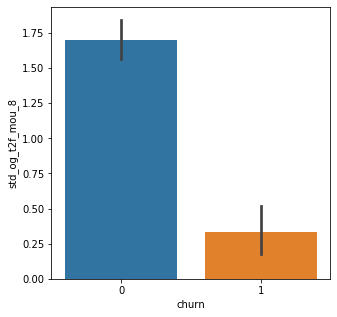


COLUMN  std_og_mou_6 



<Figure size 360x360 with 0 Axes>

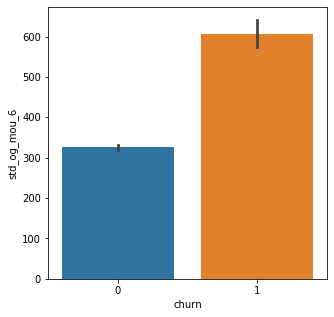


COLUMN  std_og_mou_7 



<Figure size 360x360 with 0 Axes>

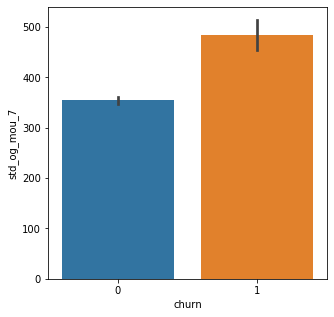


COLUMN  std_og_mou_8 



<Figure size 360x360 with 0 Axes>

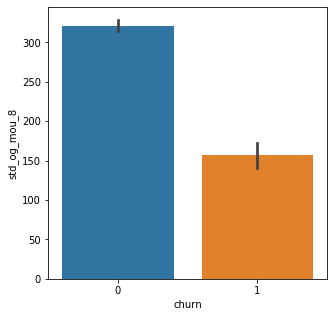


COLUMN  isd_og_mou_6 



<Figure size 360x360 with 0 Axes>

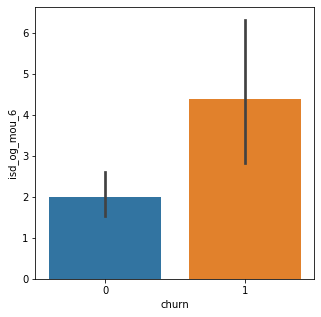


COLUMN  isd_og_mou_7 



<Figure size 360x360 with 0 Axes>

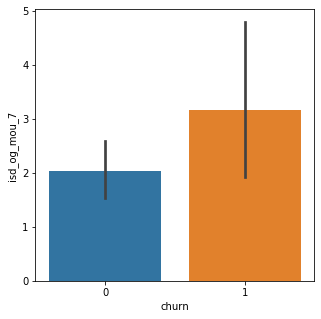


COLUMN  isd_og_mou_8 



<Figure size 360x360 with 0 Axes>

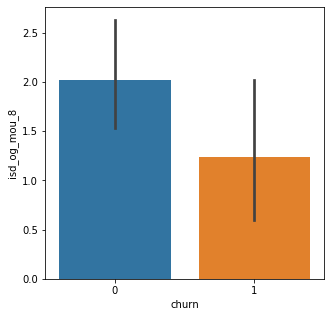


COLUMN  spl_og_mou_6 



<Figure size 360x360 with 0 Axes>

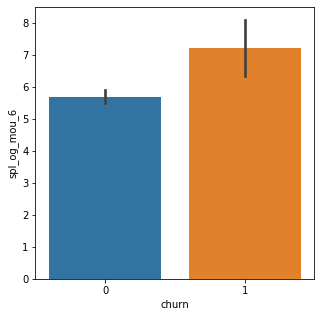


COLUMN  spl_og_mou_7 



<Figure size 360x360 with 0 Axes>

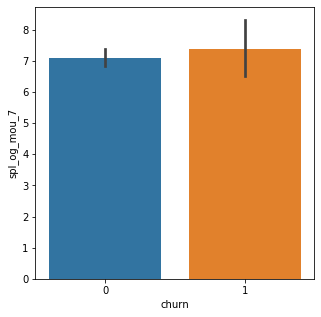


COLUMN  spl_og_mou_8 



<Figure size 360x360 with 0 Axes>

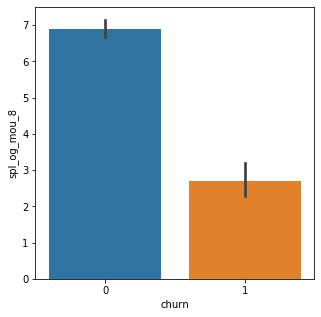


COLUMN  og_others_6 



<Figure size 360x360 with 0 Axes>

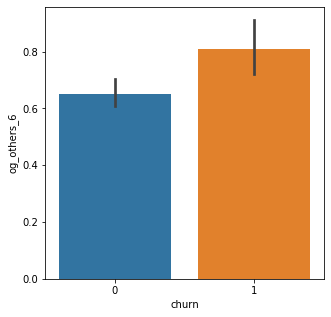


COLUMN  og_others_7 



<Figure size 360x360 with 0 Axes>

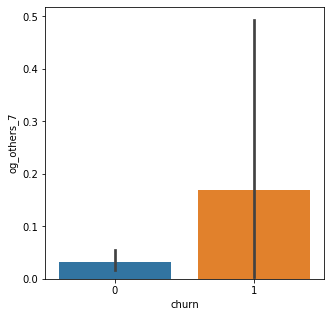


COLUMN  og_others_8 



<Figure size 360x360 with 0 Axes>

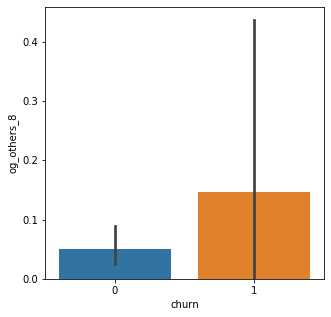


COLUMN  total_og_mou_6 



<Figure size 360x360 with 0 Axes>

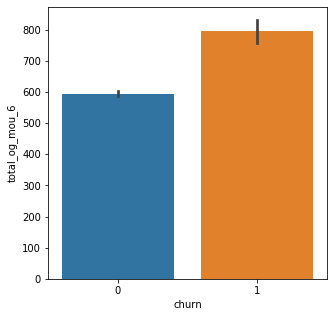


COLUMN  total_og_mou_7 



<Figure size 360x360 with 0 Axes>

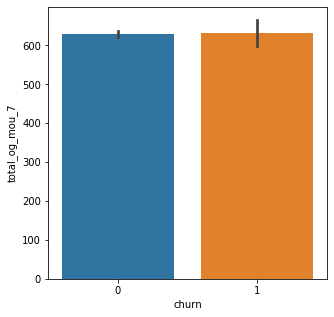


COLUMN  total_og_mou_8 



<Figure size 360x360 with 0 Axes>

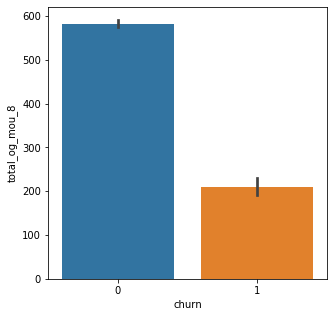


COLUMN  loc_ic_t2t_mou_6 



<Figure size 360x360 with 0 Axes>

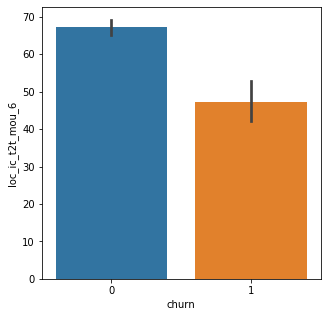


COLUMN  loc_ic_t2t_mou_7 



<Figure size 360x360 with 0 Axes>

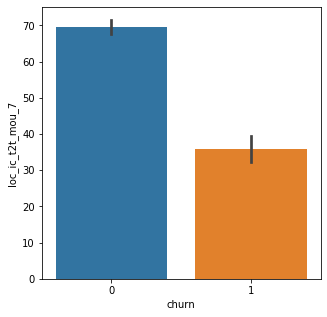


COLUMN  loc_ic_t2t_mou_8 



<Figure size 360x360 with 0 Axes>

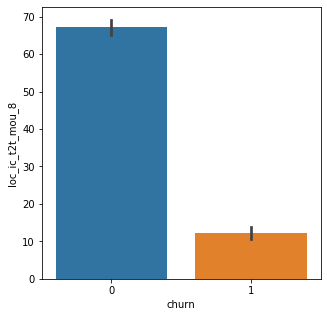


COLUMN  loc_ic_t2m_mou_6 



<Figure size 360x360 with 0 Axes>

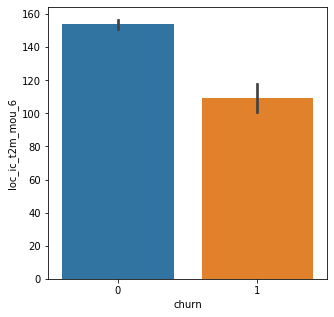


COLUMN  loc_ic_t2m_mou_7 



<Figure size 360x360 with 0 Axes>

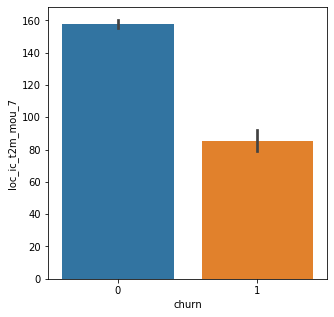


COLUMN  loc_ic_t2m_mou_8 



<Figure size 360x360 with 0 Axes>

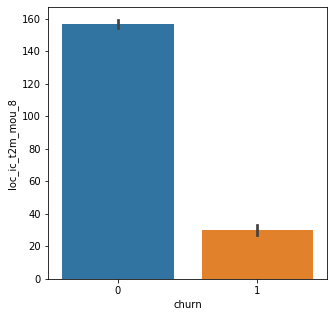


COLUMN  loc_ic_t2f_mou_6 



<Figure size 360x360 with 0 Axes>

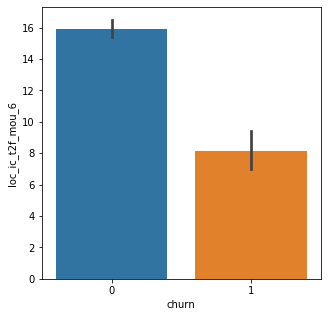


COLUMN  loc_ic_t2f_mou_7 



<Figure size 360x360 with 0 Axes>

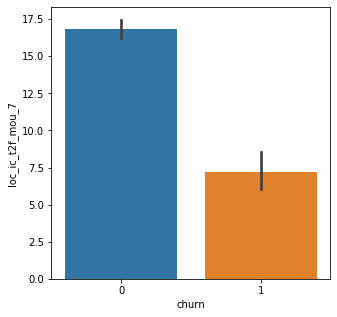


COLUMN  loc_ic_t2f_mou_8 



<Figure size 360x360 with 0 Axes>

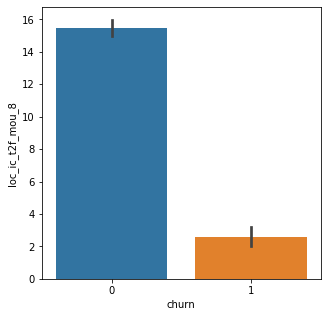


COLUMN  loc_ic_mou_6 



<Figure size 360x360 with 0 Axes>

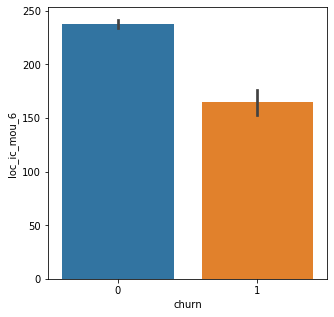


COLUMN  loc_ic_mou_7 



<Figure size 360x360 with 0 Axes>

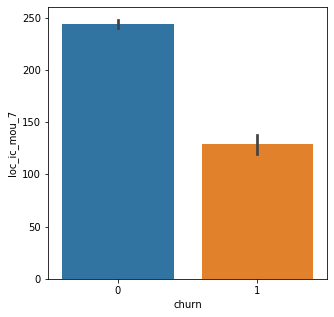


COLUMN  loc_ic_mou_8 



<Figure size 360x360 with 0 Axes>

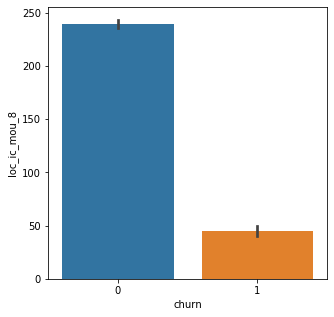


COLUMN  std_ic_t2t_mou_6 



<Figure size 360x360 with 0 Axes>

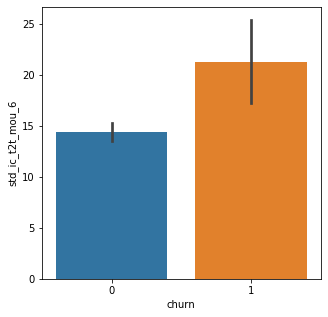


COLUMN  std_ic_t2t_mou_7 



<Figure size 360x360 with 0 Axes>

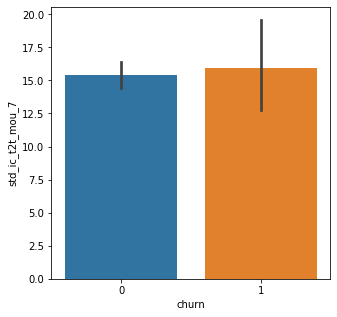


COLUMN  std_ic_t2t_mou_8 



<Figure size 360x360 with 0 Axes>

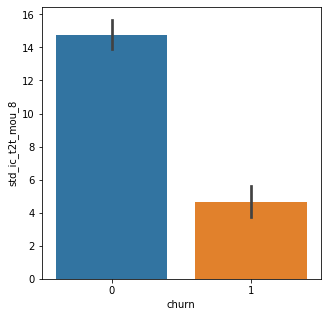


COLUMN  std_ic_t2m_mou_6 



<Figure size 360x360 with 0 Axes>

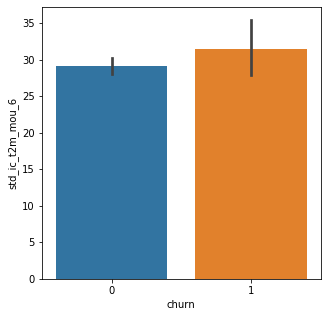


COLUMN  std_ic_t2m_mou_7 



<Figure size 360x360 with 0 Axes>

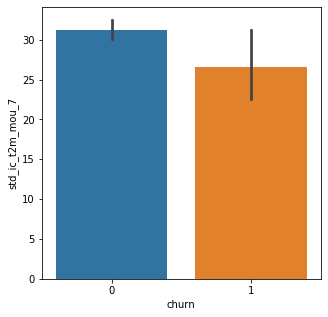


COLUMN  std_ic_t2m_mou_8 



<Figure size 360x360 with 0 Axes>

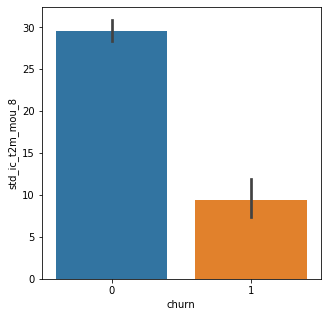


COLUMN  std_ic_t2f_mou_6 



<Figure size 360x360 with 0 Axes>

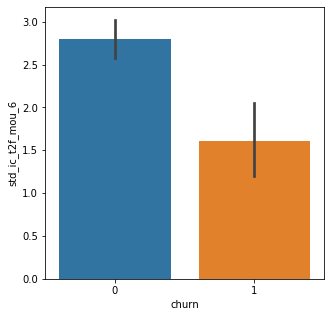


COLUMN  std_ic_t2f_mou_7 



<Figure size 360x360 with 0 Axes>

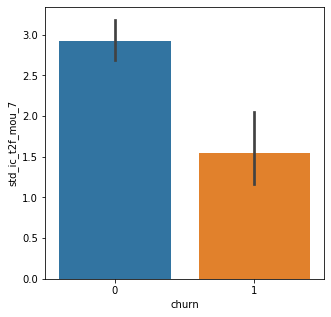


COLUMN  std_ic_t2f_mou_8 



<Figure size 360x360 with 0 Axes>

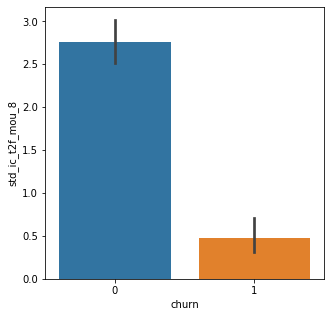


COLUMN  std_ic_mou_6 



<Figure size 360x360 with 0 Axes>

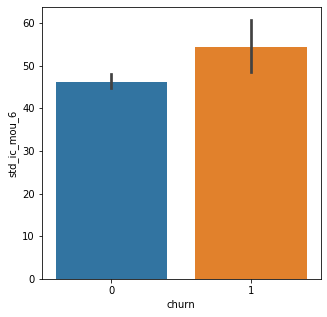


COLUMN  std_ic_mou_7 



<Figure size 360x360 with 0 Axes>

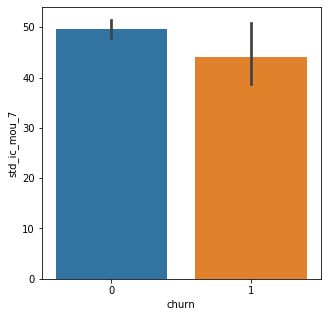


COLUMN  std_ic_mou_8 



<Figure size 360x360 with 0 Axes>

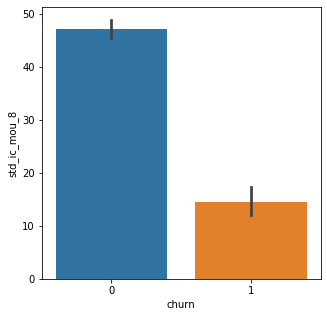


COLUMN  total_ic_mou_6 



<Figure size 360x360 with 0 Axes>

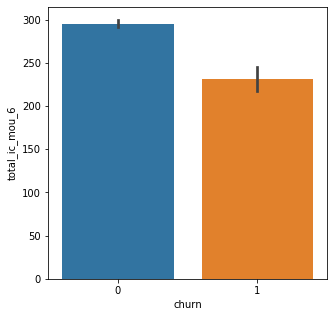


COLUMN  total_ic_mou_7 



<Figure size 360x360 with 0 Axes>

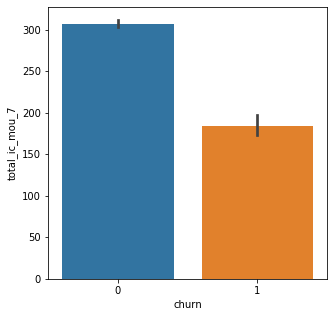


COLUMN  total_ic_mou_8 



<Figure size 360x360 with 0 Axes>

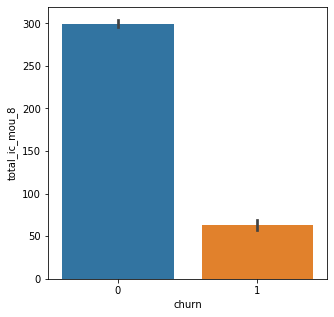


COLUMN  spl_ic_mou_6 



<Figure size 360x360 with 0 Axes>

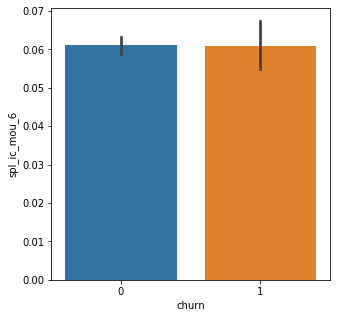


COLUMN  spl_ic_mou_7 



<Figure size 360x360 with 0 Axes>

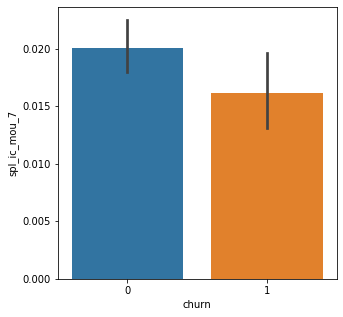


COLUMN  spl_ic_mou_8 



<Figure size 360x360 with 0 Axes>

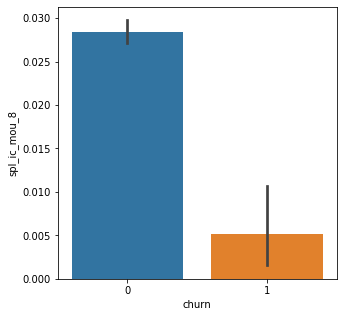


COLUMN  isd_ic_mou_6 



<Figure size 360x360 with 0 Axes>

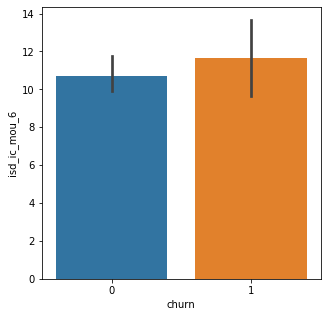


COLUMN  isd_ic_mou_7 



<Figure size 360x360 with 0 Axes>

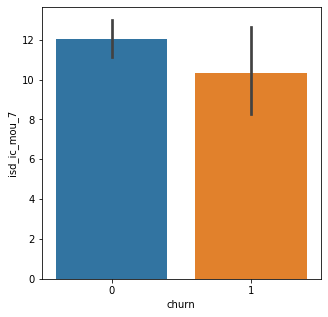


COLUMN  isd_ic_mou_8 



<Figure size 360x360 with 0 Axes>

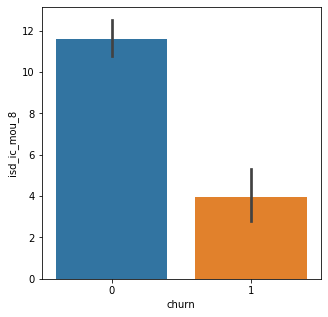


COLUMN  ic_others_6 



<Figure size 360x360 with 0 Axes>

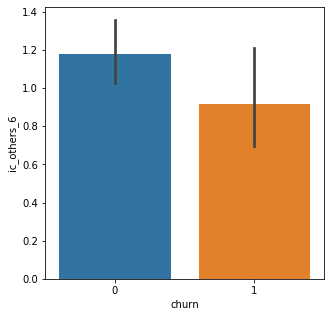


COLUMN  ic_others_7 



<Figure size 360x360 with 0 Axes>

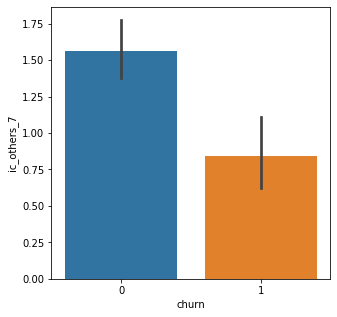


COLUMN  ic_others_8 



<Figure size 360x360 with 0 Axes>

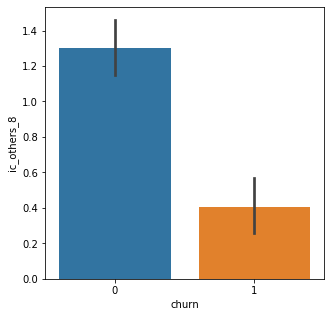


COLUMN  total_rech_num_6 



<Figure size 360x360 with 0 Axes>

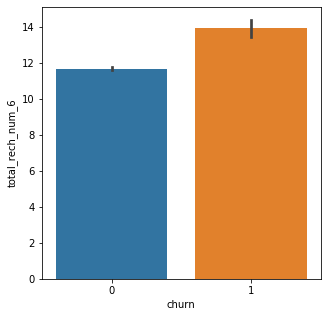


COLUMN  total_rech_num_7 



<Figure size 360x360 with 0 Axes>

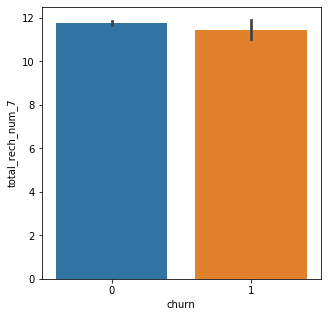


COLUMN  total_rech_num_8 



<Figure size 360x360 with 0 Axes>

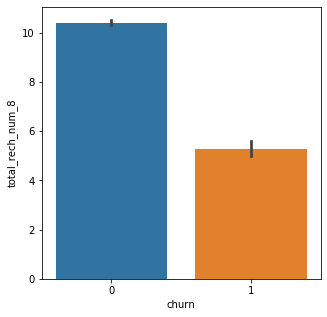


COLUMN  total_rech_amt_6 



<Figure size 360x360 with 0 Axes>

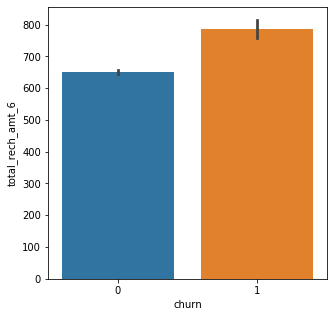


COLUMN  total_rech_amt_7 



<Figure size 360x360 with 0 Axes>

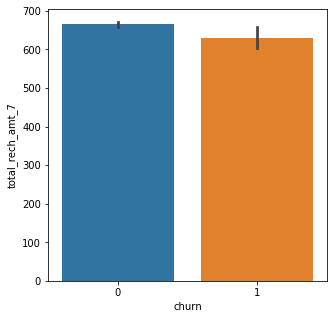


COLUMN  total_rech_amt_8 



<Figure size 360x360 with 0 Axes>

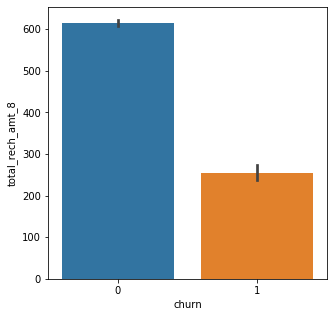


COLUMN  max_rech_amt_6 



<Figure size 360x360 with 0 Axes>

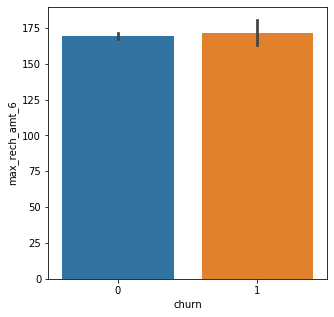


COLUMN  max_rech_amt_7 



<Figure size 360x360 with 0 Axes>

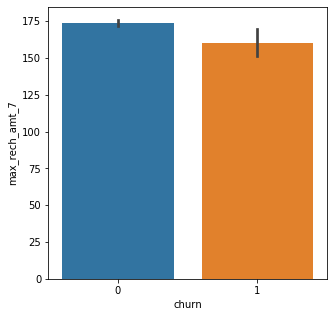


COLUMN  max_rech_amt_8 



<Figure size 360x360 with 0 Axes>

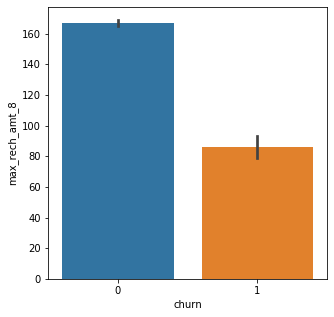


COLUMN  last_day_rch_amt_6 



<Figure size 360x360 with 0 Axes>

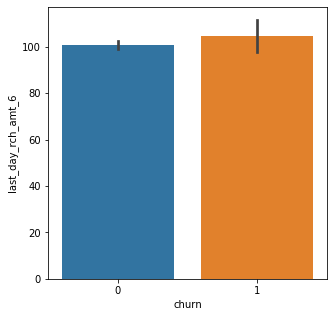


COLUMN  last_day_rch_amt_7 



<Figure size 360x360 with 0 Axes>

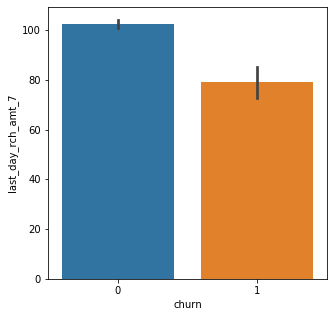


COLUMN  last_day_rch_amt_8 



<Figure size 360x360 with 0 Axes>

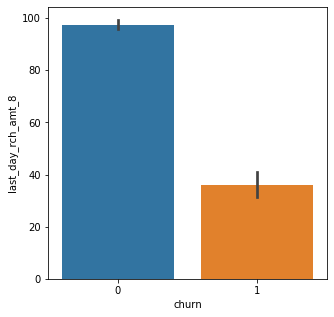


COLUMN  total_rech_data_6 



<Figure size 360x360 with 0 Axes>

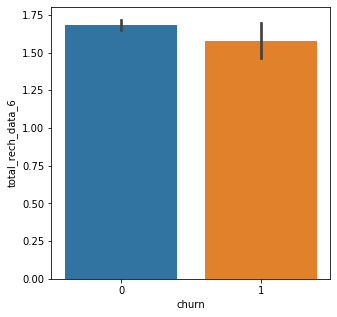


COLUMN  total_rech_data_7 



<Figure size 360x360 with 0 Axes>

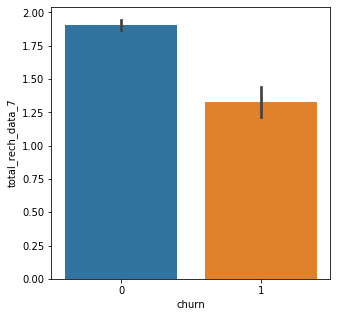


COLUMN  total_rech_data_8 



<Figure size 360x360 with 0 Axes>

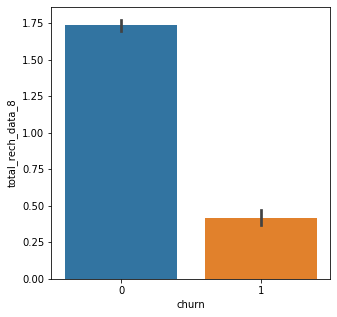


COLUMN  max_rech_data_6 



<Figure size 360x360 with 0 Axes>

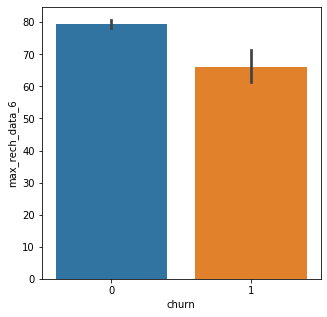


COLUMN  max_rech_data_7 



<Figure size 360x360 with 0 Axes>

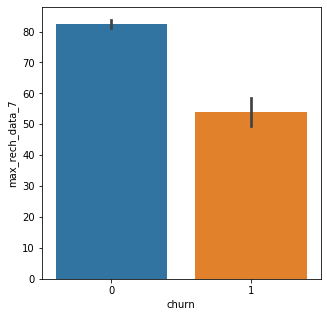


COLUMN  max_rech_data_8 



<Figure size 360x360 with 0 Axes>

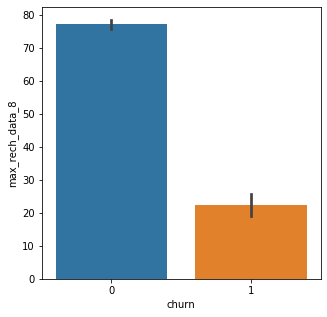


COLUMN  count_rech_2g_6 



<Figure size 360x360 with 0 Axes>

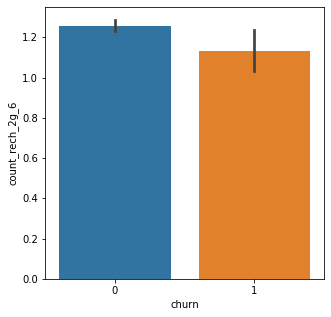


COLUMN  count_rech_2g_7 



<Figure size 360x360 with 0 Axes>

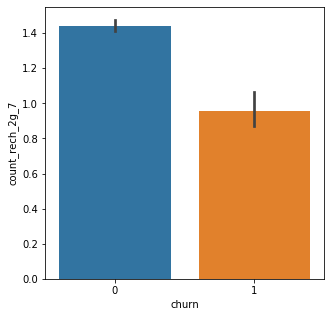


COLUMN  count_rech_2g_8 



<Figure size 360x360 with 0 Axes>

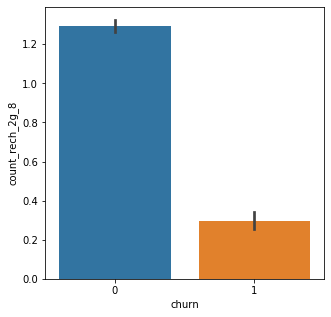


COLUMN  count_rech_3g_6 



<Figure size 360x360 with 0 Axes>

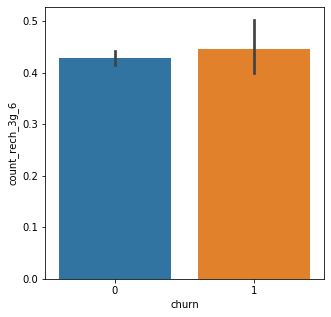


COLUMN  count_rech_3g_7 



<Figure size 360x360 with 0 Axes>

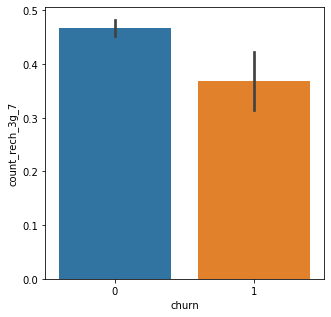


COLUMN  count_rech_3g_8 



<Figure size 360x360 with 0 Axes>

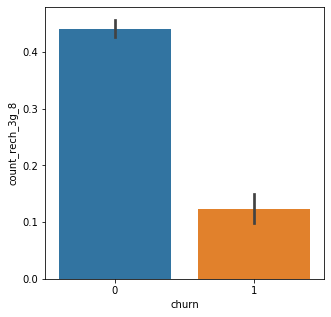


COLUMN  av_rech_amt_data_6 



<Figure size 360x360 with 0 Axes>

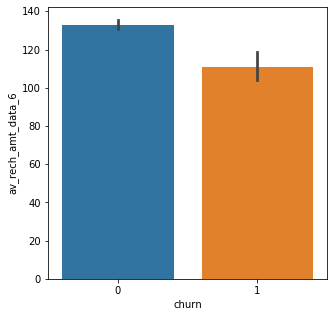


COLUMN  av_rech_amt_data_7 



<Figure size 360x360 with 0 Axes>

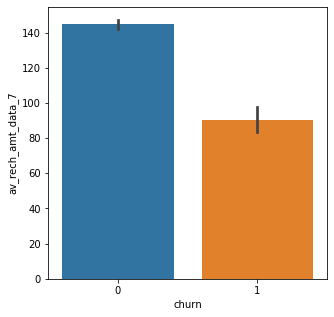


COLUMN  av_rech_amt_data_8 



<Figure size 360x360 with 0 Axes>

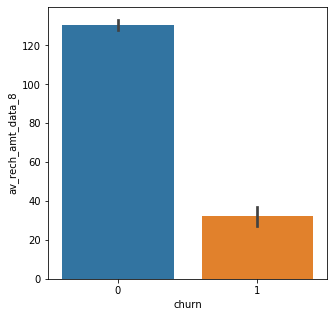


COLUMN  vol_2g_mb_6 



<Figure size 360x360 with 0 Axes>

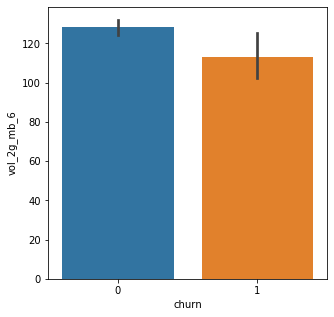


COLUMN  vol_2g_mb_7 



<Figure size 360x360 with 0 Axes>

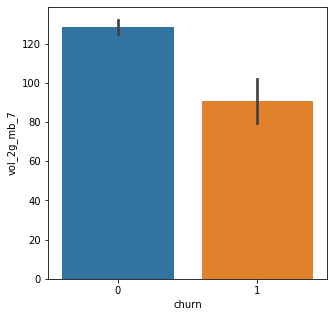


COLUMN  vol_2g_mb_8 



<Figure size 360x360 with 0 Axes>

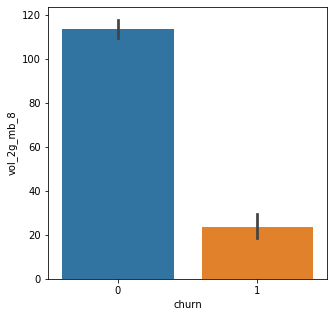


COLUMN  vol_3g_mb_6 



<Figure size 360x360 with 0 Axes>

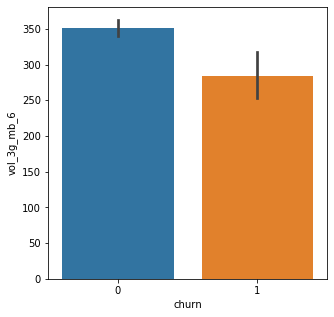


COLUMN  vol_3g_mb_7 



<Figure size 360x360 with 0 Axes>

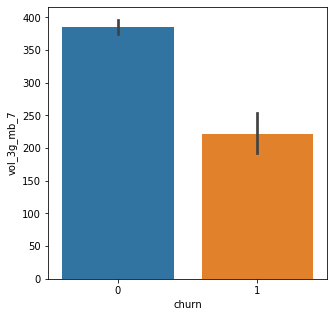


COLUMN  vol_3g_mb_8 



<Figure size 360x360 with 0 Axes>

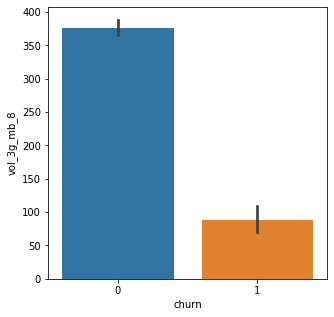


COLUMN  arpu_3g_6 



<Figure size 360x360 with 0 Axes>

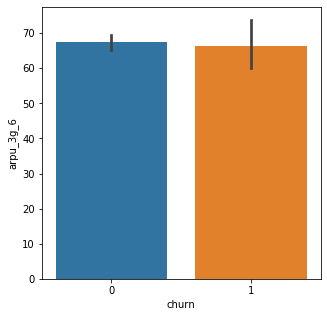


COLUMN  arpu_3g_7 



<Figure size 360x360 with 0 Axes>

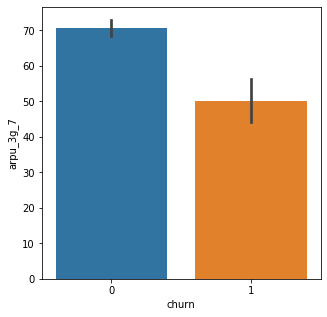


COLUMN  arpu_3g_8 



<Figure size 360x360 with 0 Axes>

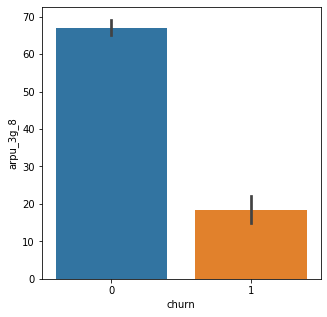


COLUMN  arpu_2g_6 



<Figure size 360x360 with 0 Axes>

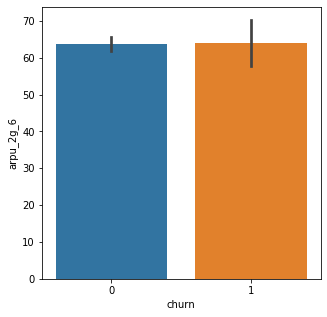


COLUMN  arpu_2g_7 



<Figure size 360x360 with 0 Axes>

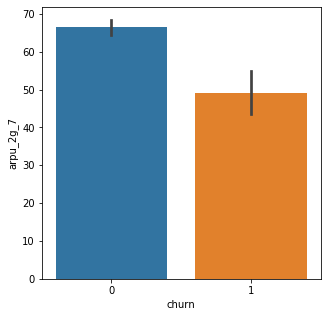


COLUMN  arpu_2g_8 



<Figure size 360x360 with 0 Axes>

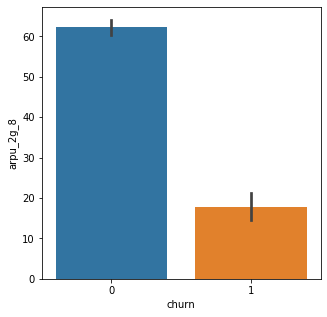


COLUMN  night_pck_user_6 



<Figure size 360x360 with 0 Axes>

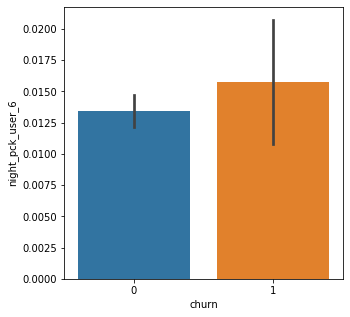


COLUMN  night_pck_user_7 



<Figure size 360x360 with 0 Axes>

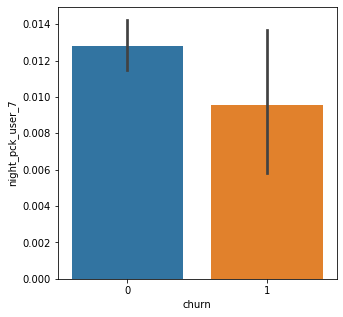


COLUMN  night_pck_user_8 



<Figure size 360x360 with 0 Axes>

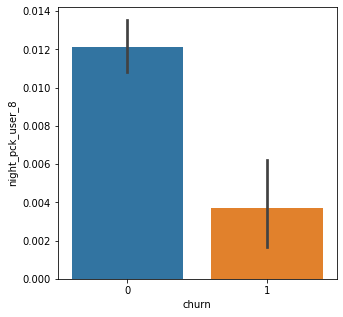


COLUMN  monthly_2g_6 



<Figure size 360x360 with 0 Axes>

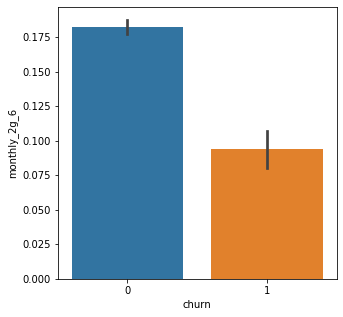


COLUMN  monthly_2g_7 



<Figure size 360x360 with 0 Axes>

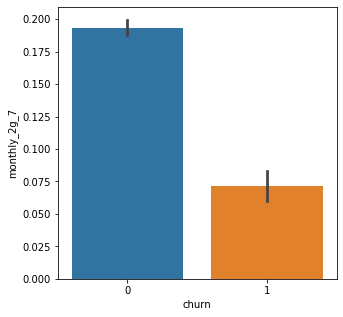


COLUMN  monthly_2g_8 



<Figure size 360x360 with 0 Axes>

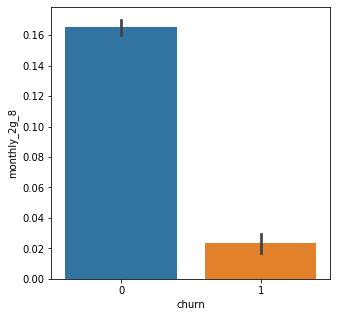


COLUMN  sachet_2g_6 



<Figure size 360x360 with 0 Axes>

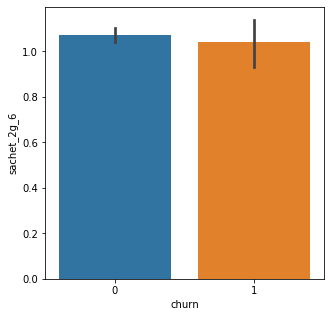


COLUMN  sachet_2g_7 



<Figure size 360x360 with 0 Axes>

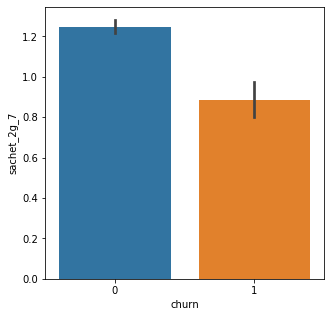


COLUMN  sachet_2g_8 



<Figure size 360x360 with 0 Axes>

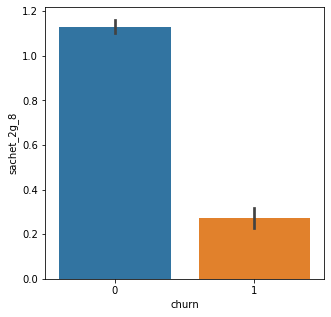


COLUMN  monthly_3g_6 



<Figure size 360x360 with 0 Axes>

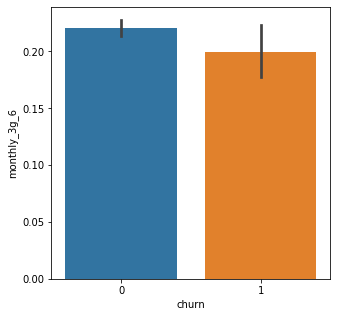


COLUMN  monthly_3g_7 



<Figure size 360x360 with 0 Axes>

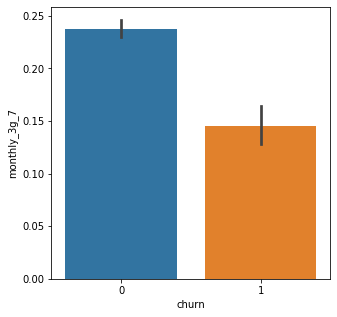


COLUMN  monthly_3g_8 



<Figure size 360x360 with 0 Axes>

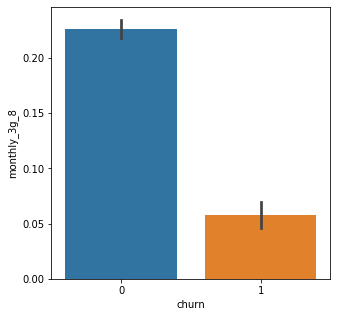


COLUMN  sachet_3g_6 



<Figure size 360x360 with 0 Axes>

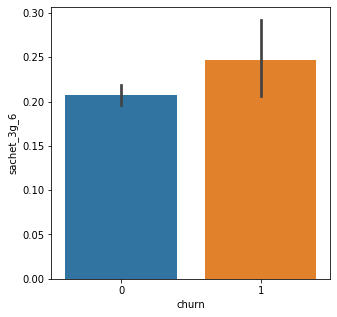


COLUMN  sachet_3g_7 



<Figure size 360x360 with 0 Axes>

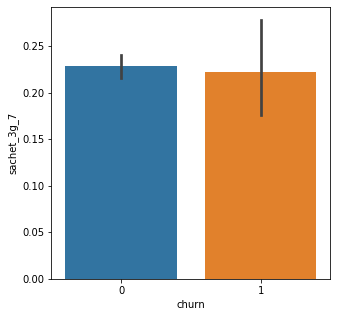


COLUMN  sachet_3g_8 



<Figure size 360x360 with 0 Axes>

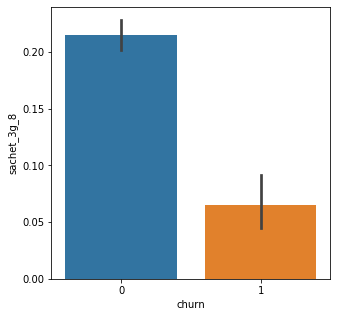


COLUMN  fb_user_6 



<Figure size 360x360 with 0 Axes>

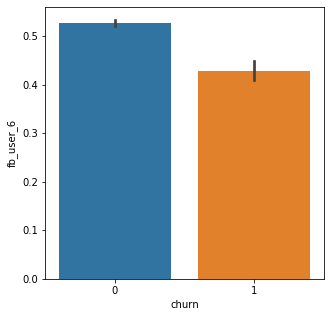


COLUMN  fb_user_7 



<Figure size 360x360 with 0 Axes>

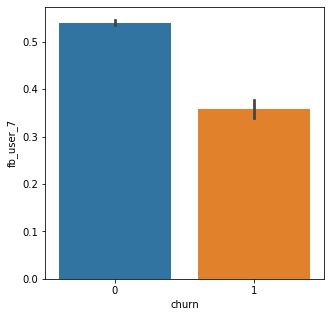


COLUMN  fb_user_8 



<Figure size 360x360 with 0 Axes>

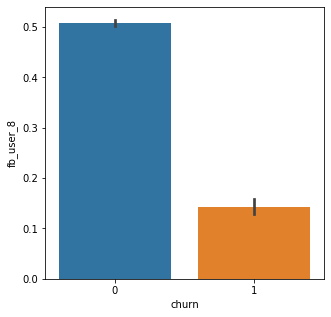


COLUMN  aon 



<Figure size 360x360 with 0 Axes>

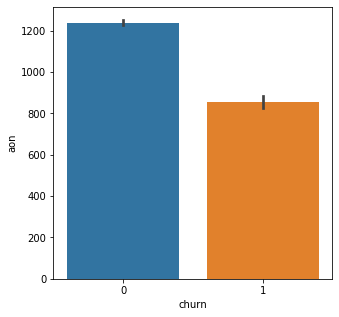


COLUMN  vbc_3g_8 



<Figure size 360x360 with 0 Axes>

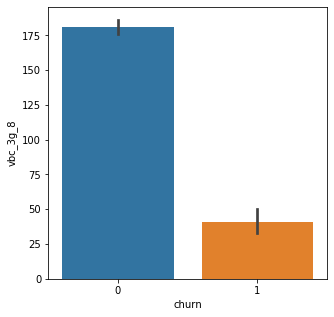


COLUMN  vbc_3g_7 



<Figure size 360x360 with 0 Axes>

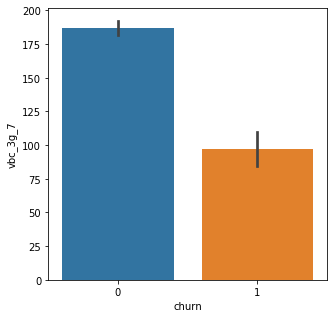


COLUMN  vbc_3g_6 



<Figure size 360x360 with 0 Axes>

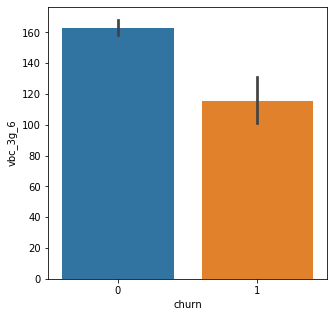


COLUMN  total_vol_data_mb_6 



<Figure size 360x360 with 0 Axes>

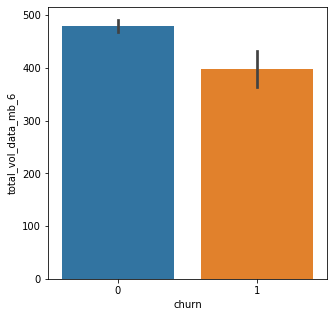


COLUMN  total_vol_data_mb_7 



<Figure size 360x360 with 0 Axes>

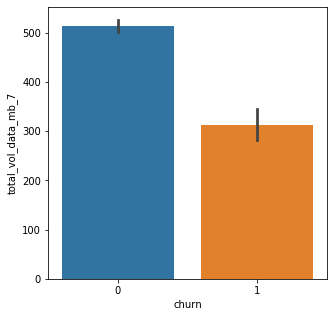


COLUMN  total_vol_data_mb_8 



<Figure size 360x360 with 0 Axes>

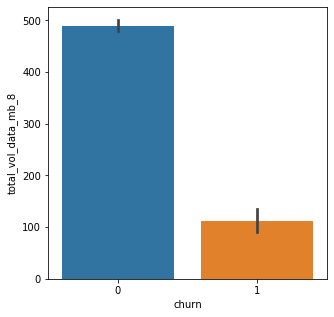


COLUMN  avg_rech_amt_6 



<Figure size 360x360 with 0 Axes>

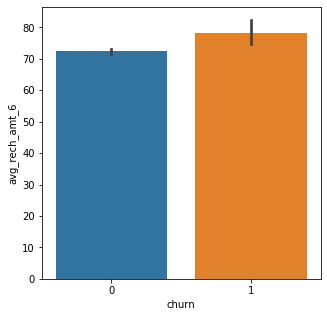


COLUMN  avg_rech_amt_7 



<Figure size 360x360 with 0 Axes>

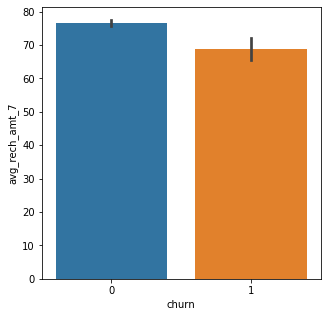


COLUMN  avg_rech_amt_8 



<Figure size 360x360 with 0 Axes>

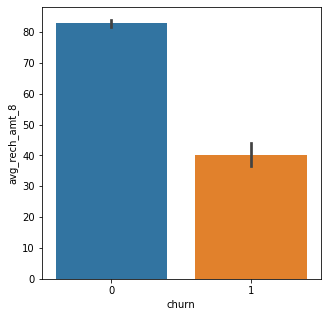


COLUMN  total_rech_num_data_6 



<Figure size 360x360 with 0 Axes>

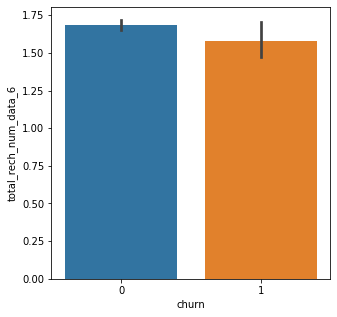


COLUMN  total_rech_num_data_7 



<Figure size 360x360 with 0 Axes>

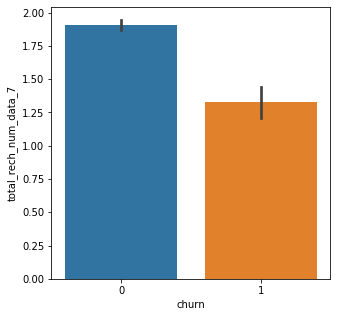


COLUMN  total_rech_num_data_8 



<Figure size 360x360 with 0 Axes>

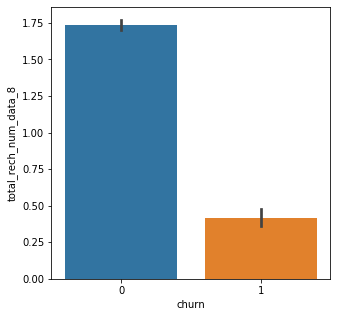


COLUMN  total_rech_amt_data_6 



<Figure size 360x360 with 0 Axes>

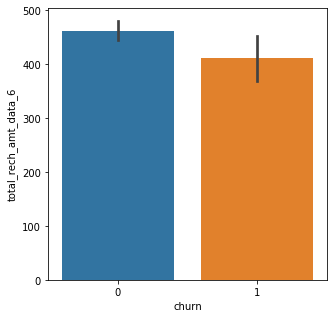


COLUMN  total_rech_amt_data_7 



<Figure size 360x360 with 0 Axes>

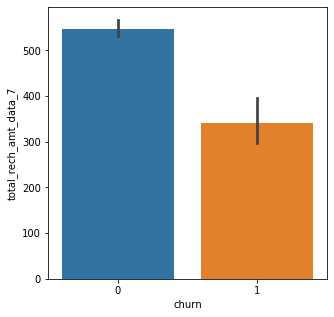


COLUMN  total_rech_amt_data_8 



<Figure size 360x360 with 0 Axes>

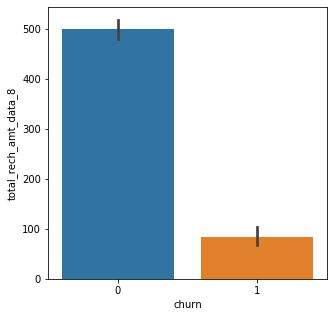


COLUMN  total_month_rech_6 



<Figure size 360x360 with 0 Axes>

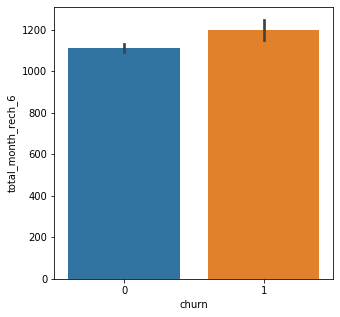


COLUMN  total_month_rech_7 



<Figure size 360x360 with 0 Axes>

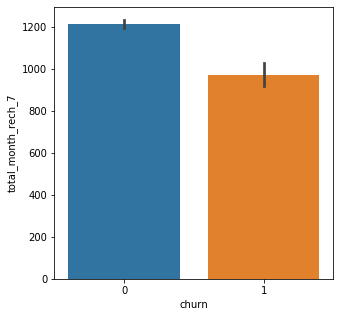


COLUMN  total_month_rech_8 



<Figure size 360x360 with 0 Axes>

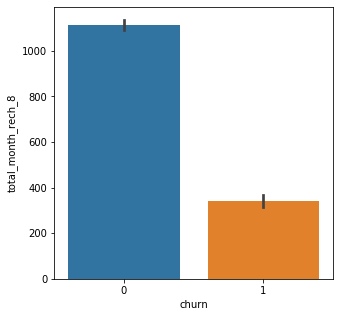


COLUMN  total_rech_amt_good_phase 



<Figure size 360x360 with 0 Axes>

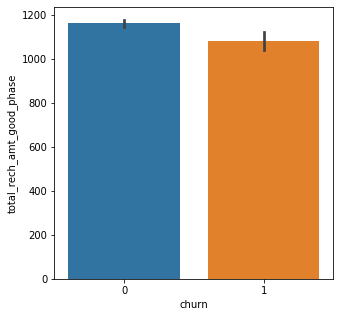


COLUMN  total_usage_churn_phase 



<Figure size 360x360 with 0 Axes>

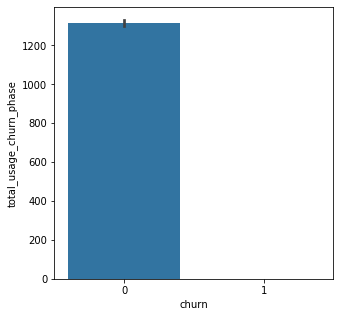

In [90]:
columns = [col for col in churn_2.columns if col not in ['churn','mobile_number']]

columns.remove("date_of_last_rech_6")
columns.remove("date_of_last_rech_7")
columns.remove("date_of_last_rech_8")
# columns.remove("date_of_last_rech_9")

for col in columns:
    print("\nCOLUMN ", col, "\n")
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=churn_2)
    plt.show()

In [91]:
churn_2.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29818 entries, 0 to 99997
Data columns (total 173 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   mobile_number              29818 non-null  int64         
 1   arpu_6                     29818 non-null  float64       
 2   arpu_7                     29818 non-null  float64       
 3   arpu_8                     29818 non-null  float64       
 4   onnet_mou_6                29818 non-null  float64       
 5   onnet_mou_7                29818 non-null  float64       
 6   onnet_mou_8                29818 non-null  float64       
 7   offnet_mou_6               29818 non-null  float64       
 8   offnet_mou_7               29818 non-null  float64       
 9   offnet_mou_8               29818 non-null  float64       
 10  roam_ic_mou_6              29818 non-null  float64       
 11  roam_ic_mou_7              29818 non-null  float64       
 12  roa

In [92]:
columns = [col for col in churn_2.columns if col not in ['churn','mobile_number']]

columns.remove("date_of_last_rech_6")
columns.remove("date_of_last_rech_7")
columns.remove("date_of_last_rech_8")

for col in columns:
    if churn_2[col].nunique() == 2:
        print("\nCOLUMN: ", col, "\n")
        print(pd.crosstab(churn_2.churn, churn_2[col], normalize='columns')*100)
        print("\n-------------------------------------------------------------")


COLUMN:  night_pck_user_6 

night_pck_user_6        0.0        1.0
churn                                 
0                 91.921665  90.640394
1                  8.078335   9.359606

-------------------------------------------------------------

COLUMN:  night_pck_user_7 

night_pck_user_7      0.0        1.0
churn                               
0                 91.8795  93.850267
1                  8.1205   6.149733

-------------------------------------------------------------

COLUMN:  night_pck_user_8 

night_pck_user_8        0.0        1.0
churn                                 
0                 91.841096  97.360704
1                  8.158904   2.639296

-------------------------------------------------------------

COLUMN:  fb_user_6 

fb_user_6        0.0        1.0
churn                          
0          90.384481  93.310518
1           9.615519   6.689482

-------------------------------------------------------------

COLUMN:  fb_user_7 

fb_user_7        0.0        1

In [94]:
list(churn_2.columns)

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

In [95]:
churn_2.drop("mobile_number", axis = 1, inplace=True)
churn_2.drop(["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"], axis=1, inplace=True)

## Scaling and PCA

In [96]:
from sklearn.model_selection import train_test_split

X = churn_2.drop(['churn'], axis=1)
y = churn_2['churn']    

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=42)

In [97]:
# Scaling the features before PCA as it is sensitive to the scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [98]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Handling class imbalance

In [99]:
# Handling class imbalance

from imblearn.over_sampling import SMOTE
X_train_resampled, y_train_resampled = SMOTE(random_state=100).fit_sample(X_train, y_train)

In [100]:
churn_2.shape

(29818, 169)

In [101]:
print(sum(y_train_resampled==1))
print(sum(y_train_resampled==0))
print(round(sum(y_train_resampled == 1) / len(y_train_resampled)*100, 2))

19163
19163
50.0


### PCA

In [102]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(0.95, random_state=42)

In [103]:
pca_train = pca.fit_transform(X_train_resampled)

In [104]:
pca_train.shape

(38326, 25)

In [105]:
pca.explained_variance_ratio_

array([0.52993821, 0.11639376, 0.08339957, 0.04580408, 0.02479427,
       0.02333838, 0.01879158, 0.01640767, 0.01366433, 0.01107526,
       0.00875391, 0.0077371 , 0.00727889, 0.00614761, 0.00494652,
       0.00424071, 0.00410753, 0.00383687, 0.0037426 , 0.00341905,
       0.00317977, 0.00313048, 0.00295755, 0.00275529, 0.00266791])

Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

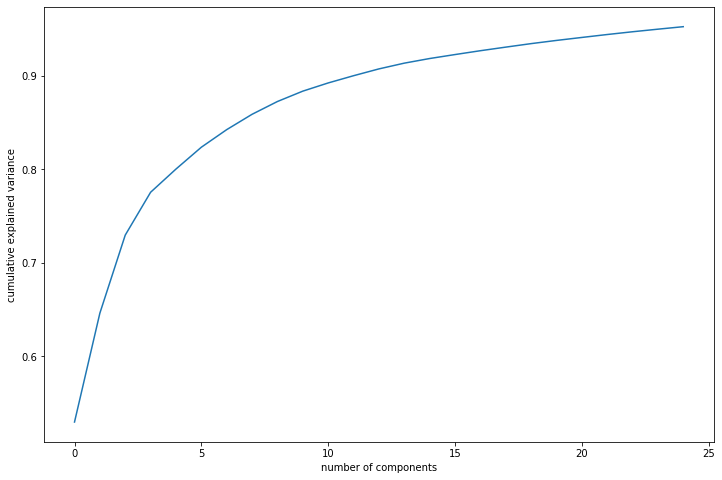

In [106]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

<BarContainer object of 25 artists>

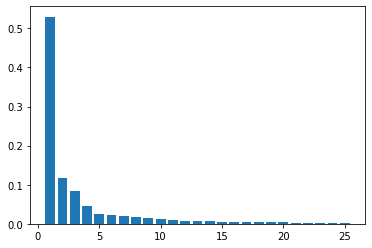

In [107]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [108]:
# PCA on test:
pca_test = pca.transform(X_test)
pca_test.shape

(8946, 25)

## Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [110]:
lr_1 = LogisticRegression(class_weight='balanced')

In [112]:
lr_1.fit(pca_train, y_train_resampled)

LogisticRegression(class_weight='balanced')

In [113]:
# prediction
lr_1_train_pred = lr_1.predict(pca_train)

In [114]:
lr_1_train_pred_prob = lr_1.predict_proba(pca_train)[:,1]

In [115]:
# cross val
cv_score = cross_val_score(lr_1, pca_train, y_train_resampled, cv=5, scoring='roc_auc')
round(np.mean(cv_score), 2)

0.9

In [116]:
# AUC
round(metrics.roc_auc_score(y_train_resampled, lr_1_train_pred), 2)

0.83

In [117]:
round(metrics.roc_auc_score(y_train_resampled, lr_1_train_pred_prob), 2)

0.9

In [118]:
# Recall
round(metrics.recall_score(y_train_resampled, lr_1_train_pred), 2)

0.85

In [120]:
cut_off_porb = 0.5
y_train = pd.DataFrame({'churn': y_train_resampled, 'churn_Prob': lr_1_train_pred_prob})
y_train['final_pred'] = y_train['churn_Prob'].map( lambda x: 1 if x > cut_off_porb else 0)
y_train.head()

churn  churn_Prob  final_pred
0      0    0.030580           0
1      0    0.021428           0
2      0    0.358512           0
3      0    0.299698           0
4      0    0.896984           1

In [121]:
confusion_train_pred = metrics.confusion_matrix(y_train["churn"], y_train["final_pred"])
confusion_train_pred

array([[15348,  3815],
       [ 2872, 16291]])

In [122]:
TP = confusion_train_pred[1,1] 
TN = confusion_train_pred[0,0]
FP = confusion_train_pred[0,1]
FN = confusion_train_pred[1,0]

In [123]:
print("Roc_auc_score ", metrics.roc_auc_score(y_train["churn"], y_train["final_pred"]))
    
print('Sensitivity/Recall : ', TP / float(TP+FN))

print('Specificity: ', TN / float(TN+FP))

print('Precision score value: ', metrics.precision_score(y_train["churn"], y_train["final_pred"]))

Roc_auc_score  0.825523143557898
Sensitivity/Recall :  0.8501278505453217
Specificity:  0.8009184365704743
Precision score value:  0.8102556450810703


In [124]:
# ON TEST

lr_1_test_pred = lr_1.predict(pca_test)
lr_1_test_pred_prob = lr_1.predict_proba(pca_test)[:,1]

cut_off_porb = 0.5

y_test_df = pd.DataFrame({'churn': y_test, 'churn_Prob': lr_1_test_pred_prob})
y_test_df['final_pred'] = y_test_df['churn_Prob'].map( lambda x: 1 if x > cut_off_porb else 0)

y_test_df.head()

churn  churn_Prob  final_pred
18223      0    0.091987           0
1950       0    0.011724           0
965        0    0.036895           0
51628      0    0.573224           1
77937      0    0.071496           0

In [125]:
confusion_test_pred = metrics.confusion_matrix(y_test_df["churn"], y_test_df["final_pred"])
confusion_test_pred

array([[6666, 1575],
       [ 125,  580]])

In [126]:
# on test
TP = confusion_test_pred[1,1] 
TN = confusion_test_pred[0,0]
FP = confusion_test_pred[0,1]
FN = confusion_test_pred[1,0]

In [127]:
print("TEST: \n")

print("Roc_auc_score ", metrics.roc_auc_score(y_test_df["churn"], y_test_df["final_pred"]))
    
print('Sensitivity/Recall : ', TP / float(TP+FN))

print('Specificity: ', TN / float(TN+FP))

print('Precision score value: ', metrics.precision_score(y_test_df["churn"], y_test_df["final_pred"]))

TEST: 

Roc_auc_score  0.8157887263216868
Sensitivity/Recall :  0.8226950354609929
Specificity:  0.8088824171823807
Precision score value:  0.2691415313225058


## Random Forest

In [139]:
n_folds = 5
paramters = {'max_depth': range(10,30,5)}

rf = RandomForestClassifier(random_state=42, class_weight='balanced_subsample')

In [140]:
rf_gscv = GridSearchCV(rf, 
                       param_grid=paramters, 
                       scoring='recall', 
                       cv=n_folds, 
                       return_train_score=True, 
                       n_jobs=-1)

rf_gscv.fit(pca_train, y_train_resampled)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=42),
             n_jobs=-1, param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='recall')

In [141]:
rf_gscv.best_score_

0.9705162071822165

In [142]:
rf_gscv.best_params_

{'max_depth': 20}

In [143]:
scores = rf_gscv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      23.284044      0.284390         0.190982        0.017576   
1      30.210225      1.739700         0.221138        0.013513   
2      34.516746      0.674411         0.246942        0.023965   
3      26.461444      4.366255         0.173660        0.033411   

  param_max_depth             params  split0_test_score  split1_test_score  \
0              10  {'max_depth': 10}           0.903731           0.909447   
1              15  {'max_depth': 15}           0.970258           0.966336   
2              20  {'max_depth': 20}           0.975215           0.972077   
3              25  {'max_depth': 25}           0.972606           0.972338   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.901879           0.892773           0.906601         0.902886   
1           0.966336           0.962171           0.966084         0.966237   
2           0.971033           0.965301           0.968954         0.970516   
3           0.968946           0.963736           0.967910         0.969107   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.005672                4            0.939791            0.937708   
1        0.002559                3            0.998500            0.998826   
2        0.003299                1            1.000000            1.000000   
3        0.003256                2            1.000000            1.000000   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.935425            0.932746            0.937508   
1            0.999022            0.998956            0.998826   
2            1.000000            1.000000            1.000000   
3            1.000000            1.000000            1.000000   

   mean_train_score  std_train_score  
0          0.936636         0.002386  
1          0.998826         0.000180  
2          1.000000         0.000000  
3          1.000000         0.000000

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'scores')

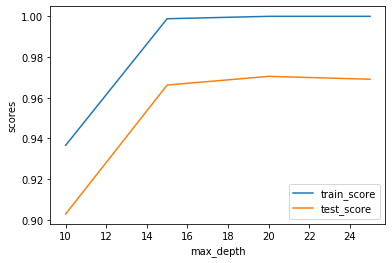

In [144]:
plt.plot(scores['param_max_depth'], scores['mean_train_score'])

plt.plot(scores['param_max_depth'], scores['mean_test_score'])

plt.legend(['train_score', 'test_score'])
plt.xlabel('max_depth')

plt.ylabel('scores')
plt.show()

In [145]:
parameters = {'n_estimators': [10, 20, 50, 100, 200, 300, 500]} 

rf = RandomForestClassifier(random_state=42, class_weight='balanced_subsample', max_depth=20)

rf_gscv_2 = GridSearchCV(rf, 
                    param_grid=parameters, 
                    cv=5, 
                    return_train_score=True, 
                    scoring='recall',
                    n_jobs=-1)



In [146]:
rf_gscv_2.fit(pca_train, y_train_resampled)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              max_depth=20, random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 50, 100, 200, 300, 500]},
             return_train_score=True, scoring='recall')

In [147]:
rf_gscv_2.best_score_

0.9712990881843042

In [148]:
rf_gscv_2.best_params_

{'n_estimators': 500}

In [149]:
scores_2 = rf_gscv_2.cv_results_
pd.DataFrame(scores_2).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.647891      0.056509         0.025880        0.001469   
1       5.648540      0.150073         0.047134        0.006934   
2      16.756260      0.550919         0.143311        0.022540   
3      34.719329      0.779472         0.244901        0.015858   
4      68.634494      0.972334         0.482837        0.031513   

  param_n_estimators                 params  split0_test_score  \
0                 10   {'n_estimators': 10}           0.948604   
1                 20   {'n_estimators': 20}           0.964258   
2                 50   {'n_estimators': 50}           0.972085   
3                100  {'n_estimators': 100}           0.975215   
4                200  {'n_estimators': 200}           0.974693   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.950678           0.942067           0.941821           0.944169   
1           0.962161           0.960073           0.957214           0.961127   
2           0.969207           0.969729           0.962953           0.965562   
3           0.972077           0.971033           0.965301           0.968954   
4           0.972860           0.971555           0.964519           0.968171   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.945468        0.003565                7            0.997326   
1         0.960966        0.002331                6            0.999609   
2         0.967907        0.003240                5            1.000000   
3         0.970516        0.003299                3            1.000000   
4         0.970360        0.003616                4            1.000000   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.997130            0.997391            0.997586   
1            0.999543            0.999478            0.999609   
2            1.000000            0.999935            1.000000   
3            1.000000            1.000000            1.000000   
4            1.000000            1.000000            1.000000   

   split4_train_score  mean_train_score  std_train_score  
0            0.997260          0.997339         0.000151  
1            0.999674          0.999583         0.000067  
2            1.000000          0.999987         0.000026  
3            1.000000          1.000000         0.000000  
4            1.000000          1.000000         0.000000

Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'scores')

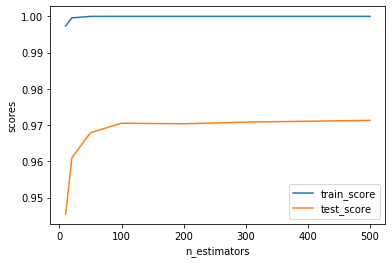

In [150]:
plt.plot(scores_2['param_n_estimators'], scores_2['mean_train_score'])

plt.plot(scores_2['param_n_estimators'], scores_2['mean_test_score'])

plt.legend(['train_score', 'test_score'])
plt.xlabel('n_estimators')

plt.ylabel('scores')
plt.show()

In [151]:
# let us choose n_estimators as around 40

In [152]:
parameters = {'max_features': range(5, 100, 10)}  

rf = RandomForestClassifier(random_state=42, class_weight='balanced_subsample', max_depth=20, n_estimators = 40)

In [153]:
rf_gscv_3 = GridSearchCV(rf, 
                         param_grid=parameters, 
                         cv=5, 
                         return_train_score=True, 
                         scoring='recall',
                         n_jobs=-1)



In [154]:
rf_gscv_3.fit(pca_train, y_train_resampled)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              max_depth=20, n_estimators=40,
                                              random_state=42),
             n_jobs=-1, param_grid={'max_features': range(5, 100, 10)},
             return_train_score=True, scoring='recall')

In [155]:
print("Best score: ", rf_gscv_3.best_score_)
print("Best Params: ", rf_gscv_3.best_params_)

scores_3 = rf_gscv_3.cv_results_
pd.DataFrame(scores_3).head()

Best score:  0.9665503590127923
Best Params:  {'max_features': 5}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      11.264876      0.362601         0.165651        0.085752   
1      37.038987      0.678281         0.100488        0.010612   
2      51.506774      5.762573         0.060027        0.008439   
3       0.094944      0.020927         0.000000        0.000000   
4       0.114189      0.010871         0.000000        0.000000   

  param_max_features                params  split0_test_score  \
0                  5   {'max_features': 5}           0.969997   
1                 15  {'max_features': 15}           0.970258   
2                 25  {'max_features': 25}           0.969215   
3                 35  {'max_features': 35}                NaN   
4                 45  {'max_features': 45}                NaN   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.967902           0.969729           0.959562           0.965562   
1           0.970251           0.966858           0.959040           0.965823   
2           0.961378           0.959551           0.957735           0.962953   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.966550        0.003837                1            1.000000   
1         0.966446        0.004109                2            0.999935   
2         0.962166        0.003934                3            0.999935   
3              NaN             NaN                4                 NaN   
4              NaN             NaN                5                 NaN   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.999935            0.999935            0.999870   
1            1.000000            0.999935            0.999870   
2            0.999870            0.999870            0.999935   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          0.999948         0.000049  
1            0.999935          0.999935         0.000041  
2            0.999935          0.999909         0.000032  
3                 NaN               NaN              NaN  
4                 NaN               NaN              NaN

Text(0.5, 0, 'max_features')

Text(0, 0.5, 'scores')

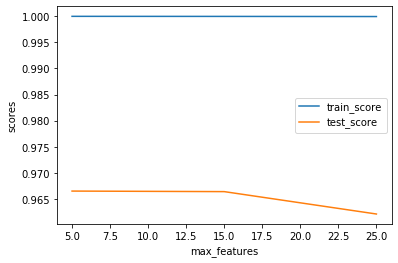

In [156]:
plt.plot(scores_3['param_max_features'], scores_3['mean_train_score'])

plt.plot(scores_3['param_max_features'], scores_3['mean_test_score'])

plt.legend(['train_score', 'test_score'])
plt.xlabel('max_features')

plt.ylabel('scores')
plt.show()

In [159]:
# let us choose max_features as 15

In [160]:
parameters = {'min_samples_leaf': range(100, 1000, 50)}  

rf = RandomForestClassifier(random_state=42, 
                            class_weight='balanced_subsample', 
                            max_depth=20, 
                            n_estimators = 40,
                            max_features = 15
                           )

rf_gscv_4 = GridSearchCV(rf, 
                         param_grid=parameters, 
                         cv=5, 
                         return_train_score=True, 
                         scoring='recall',
                         n_jobs=-1)

rf_gscv_4.fit(pca_train, y_train_resampled)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              max_depth=20, max_features=15,
                                              n_estimators=40,
                                              random_state=42),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 1000, 50)},
             return_train_score=True, scoring='recall')

In [161]:
print("Best score: ", rf_gscv_4.best_score_)
print("Best Params: ", rf_gscv_4.best_params_)

scores_4 = rf_gscv_4.cv_results_
pd.DataFrame(scores_4).head()

Best score:  0.8410485907733467
Best Params:  {'min_samples_leaf': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      25.105984      0.383759         0.082951        0.026184   
1      23.369870      0.774574         0.064130        0.002092   
2      22.885419      0.341076         0.077762        0.016815   
3      22.127989      0.705635         0.074437        0.019992   
4      20.829609      0.719996         0.061169        0.003518   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.830159   
1                    150  {'min_samples_leaf': 150}           0.827028   
2                    200  {'min_samples_leaf': 200}           0.820767   
3                    250  {'min_samples_leaf': 250}           0.811375   
4                    300  {'min_samples_leaf': 300}           0.800678   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.853862           0.842380           0.836421           0.842421   
1           0.837944           0.835073           0.827289           0.836160   
2           0.834029           0.828027           0.816071           0.822332   
3           0.824635           0.819154           0.807722           0.815810   
4           0.816545           0.816806           0.804331           0.806679   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.841049        0.007847                1            0.851663   
1         0.832699        0.004616                2            0.847554   
2         0.824245        0.006207                3            0.836073   
3         0.815739        0.005901                4            0.825962   
4         0.809008        0.006547                5            0.817873   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.856043            0.851869            0.852903   
1            0.836932            0.840519            0.842857   
2            0.831648            0.831844            0.831376   
3            0.823169            0.821277            0.825245   
4            0.815211            0.820103            0.817939   

   split4_train_score  mean_train_score  std_train_score  
0            0.852381          0.852972         0.001595  
1            0.839791          0.841531         0.003556  
2            0.830202          0.832229         0.002005  
3            0.824201          0.823971         0.001646  
4            0.809785          0.816182         0.003555

Text(0.5, 0, 'min_samples_leaf')

Text(0, 0.5, 'scores')

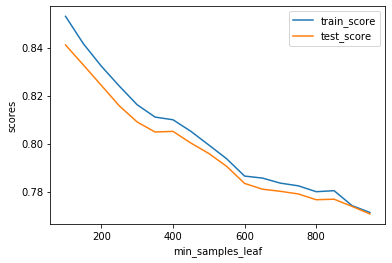

In [162]:
plt.plot(scores_4['param_min_samples_leaf'], scores_4['mean_train_score'])

plt.plot(scores_4['param_min_samples_leaf'], scores_4['mean_test_score'])

plt.legend(['train_score', 'test_score'])
plt.xlabel('min_samples_leaf')

plt.ylabel('scores')
plt.show()

In [163]:
# let us choose min_samples_leaf as 100

In [164]:
parameters = {'min_samples_split': range(10, 1000, 50)} 

rf = RandomForestClassifier(random_state=42, 
                            class_weight='balanced_subsample', 
                            max_depth=20, 
                            n_estimators = 40,
                            max_features = 15,
                            min_samples_leaf = 100
                           )

rf_gscv_5 = GridSearchCV(rf, 
                         param_grid=parameters, 
                         cv=5, 
                         return_train_score=True, 
                         scoring='recall',
                         n_jobs=-1)

rf_gscv_5.fit(pca_train, y_train_resampled)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              max_depth=20, max_features=15,
                                              min_samples_leaf=100,
                                              n_estimators=40,
                                              random_state=42),
             n_jobs=-1, param_grid={'min_samples_split': range(10, 1000, 50)},
             return_train_score=True, scoring='recall')

In [165]:
print("Best score: ", rf_gscv_5.best_score_)
print("Best Params: ", rf_gscv_5.best_params_)

scores_5 = rf_gscv_5.cv_results_
pd.DataFrame(scores_5).head()

Best score:  0.8419357469769995
Best Params:  {'min_samples_split': 210}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      17.972824      0.144292         0.067444        0.001410   
1      20.118539      2.703246         0.066688        0.002428   
2      23.793157      0.194365         0.075692        0.021036   
3      23.691299      0.207478         0.067999        0.000847   
4      23.445599      0.235011         0.066030        0.001436   

  param_min_samples_split                      params  split0_test_score  \
0                      10   {'min_samples_split': 10}           0.830159   
1                      60   {'min_samples_split': 60}           0.830159   
2                     110  {'min_samples_split': 110}           0.830159   
3                     160  {'min_samples_split': 160}           0.830159   
4                     210  {'min_samples_split': 210}           0.831464   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.853862           0.842380           0.836421           0.842421   
1           0.853862           0.842380           0.836421           0.842421   
2           0.853862           0.842380           0.836421           0.842421   
3           0.853862           0.842380           0.836421           0.842421   
4           0.856994           0.841597           0.835638           0.843986   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.841049        0.007847                2            0.851663   
1         0.841049        0.007847                2            0.851663   
2         0.841049        0.007847                2            0.851663   
3         0.841049        0.007847                2            0.851663   
4         0.841936        0.008722                1            0.855251   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.856043            0.851869            0.852903   
1            0.856043            0.851869            0.852903   
2            0.856043            0.851869            0.852903   
3            0.856043            0.851869            0.852903   
4            0.855000            0.852912            0.851402   

   split4_train_score  mean_train_score  std_train_score  
0            0.852381          0.852972         0.001595  
1            0.852381          0.852972         0.001595  
2            0.852381          0.852972         0.001595  
3            0.852381          0.852972         0.001595  
4            0.850554          0.853024         0.001876

Text(0.5, 0, 'min_samples_split')

Text(0, 0.5, 'scores')

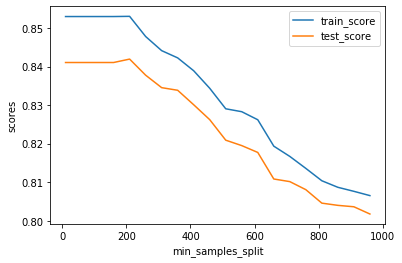

In [166]:
plt.plot(scores_5['param_min_samples_split'], scores_5['mean_train_score'])

plt.plot(scores_5['param_min_samples_split'], scores_5['mean_test_score'])

plt.legend(['train_score', 'test_score'])
plt.xlabel('min_samples_split')

plt.ylabel('scores')
plt.show()

In [167]:
# let us choose min_samples_split as 210

In [168]:
# Final Random Forest

rfc = RandomForestClassifier(bootstrap=True,
                             random_state = 42,
                             max_depth = 20,
                             n_estimators = 40,
                             max_features = 15,
                             min_samples_leaf = 100,
                             min_samples_split = 210,
                             n_jobs = -1,
                             class_weight = 'balanced_subsample')

rfc.fit(pca_train, y_train_resampled)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       max_features=15, min_samples_leaf=100,
                       min_samples_split=210, n_estimators=40, n_jobs=-1,
                       random_state=42)

In [169]:
y_train_pred = rfc.predict(pca_train)

rf_score_train = accuracy_score(y_train_resampled, y_train_pred)
rf_score_train

0.8544069300213954

In [170]:
y_test_pred = rfc.predict(pca_test)

rf_score_test = accuracy_score(y_test, y_test_pred)
rf_score_test

0.8365750055890901

In [171]:
cm_rf = confusion_matrix(y_test, y_test_pred)
cm_rf

array([[6936, 1305],
       [ 157,  548]])

In [172]:
TP = cm_rf[1,1]
TN = cm_rf[0,0]
FP = cm_rf[0,1]
FN = cm_rf[1,0]

In [173]:
print("Sensitivity: ", TP / float(TP+FN))
print("Specificity: ", TN / float(TN+FP))

Sensitivity:  0.7773049645390071
Specificity:  0.841645431379687


In [174]:
pred_probs_test = rfc.predict_proba(pca_test)[:,1]
metrics.roc_auc_score(y_test, pred_probs_test)

0.879795108525871

In [175]:
rfc.feature_importances_

array([0.08504398, 0.32184359, 0.10901439, 0.01759454, 0.01649374,
       0.00640022, 0.0053946 , 0.10297088, 0.00442015, 0.01791089,
       0.03026223, 0.01981676, 0.02743003, 0.01248815, 0.01491572,
       0.010128  , 0.01367577, 0.05825125, 0.03012065, 0.00658836,
       0.01523306, 0.03074607, 0.00735121, 0.01528812, 0.02061763])

In [176]:
model_parameters = [round(val, 3) for params in list(rfc.feature_importances_.reshape(25,1)) for val in params]
print("model_parameters ", model_parameters)


model_parameters  [0.085, 0.322, 0.109, 0.018, 0.016, 0.006, 0.005, 0.103, 0.004, 0.018, 0.03, 0.02, 0.027, 0.012, 0.015, 0.01, 0.014, 0.058, 0.03, 0.007, 0.015, 0.031, 0.007, 0.015, 0.021]


In [202]:
parameters = sorted(list(zip(churn_2.columns, model_parameters)), key=lambda x: abs(x[1]), reverse=True)
parameters

{'arpu_6': 0.08504398442646002,
 'arpu_7': 0.321843591274103,
 'arpu_8': 0.10901438564823468,
 'loc_og_t2c_mou_6': 0.020617633616351928,
 'loc_og_t2f_mou_6': 0.03074606542985304,
 'loc_og_t2f_mou_7': 0.007351211954115807,
 'loc_og_t2f_mou_8': 0.015288117588032573,
 'loc_og_t2m_mou_6': 0.030120653297195377,
 'loc_og_t2m_mou_7': 0.0065883599930176145,
 'loc_og_t2m_mou_8': 0.015233059495920714,
 'loc_og_t2t_mou_6': 0.010128003759029842,
 'loc_og_t2t_mou_7': 0.013675768352449085,
 'loc_og_t2t_mou_8': 0.058251246468257606,
 'offnet_mou_6': 0.005394598043750205,
 'offnet_mou_7': 0.10297088230711554,
 'offnet_mou_8': 0.004420147235811238,
 'onnet_mou_6': 0.017594540467735537,
 'onnet_mou_7': 0.016493736156209627,
 'onnet_mou_8': 0.006400221330863795,
 'roam_ic_mou_6': 0.017910891579435404,
 'roam_ic_mou_7': 0.030262233649762865,
 'roam_ic_mou_8': 0.01981676476285983,
 'roam_og_mou_6': 0.027430032232186236,
 'roam_og_mou_7': 0.012488146682592183,
 'roam_og_mou_8': 0.014915724248656108}

In [196]:
imp_params = [param[0] for param in parameters ]
imp_params

['arpu_7',
 'arpu_8',
 'offnet_mou_7',
 'arpu_6',
 'loc_og_t2t_mou_8',
 'loc_og_t2f_mou_6',
 'roam_ic_mou_7',
 'loc_og_t2m_mou_6',
 'roam_og_mou_6',
 'loc_og_t2c_mou_6',
 'roam_ic_mou_8',
 'onnet_mou_6',
 'roam_ic_mou_6',
 'onnet_mou_7',
 'roam_og_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2t_mou_7',
 'roam_og_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_8']

In [197]:
importance = [param[1] for param in parameters ]
importance

[0.322,
 0.109,
 0.103,
 0.085,
 0.058,
 0.031,
 0.03,
 0.03,
 0.027,
 0.021,
 0.02,
 0.018,
 0.018,
 0.016,
 0.015,
 0.015,
 0.015,
 0.014,
 0.012,
 0.01,
 0.007,
 0.007,
 0.006,
 0.005,
 0.004]

In [198]:
imp_p_df = pd.DataFrame({"Col": imp_params, "Importance": importance})
imp_p_df

Col  Importance
0             arpu_7       0.322
1             arpu_8       0.109
2       offnet_mou_7       0.103
3             arpu_6       0.085
4   loc_og_t2t_mou_8       0.058
5   loc_og_t2f_mou_6       0.031
6      roam_ic_mou_7       0.030
7   loc_og_t2m_mou_6       0.030
8      roam_og_mou_6       0.027
9   loc_og_t2c_mou_6       0.021
10     roam_ic_mou_8       0.020
11       onnet_mou_6       0.018
12     roam_ic_mou_6       0.018
13       onnet_mou_7       0.016
14     roam_og_mou_8       0.015
15  loc_og_t2m_mou_8       0.015
16  loc_og_t2f_mou_8       0.015
17  loc_og_t2t_mou_7       0.014
18     roam_og_mou_7       0.012
19  loc_og_t2t_mou_6       0.010
20  loc_og_t2m_mou_7       0.007
21  loc_og_t2f_mou_7       0.007
22       onnet_mou_8       0.006
23      offnet_mou_6       0.005
24      offnet_mou_8       0.004

<Figure size 1440x720 with 0 Axes>

[Text(0, 0.5, 'Importance'), Text(0.5, 0, 'Top Features')]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

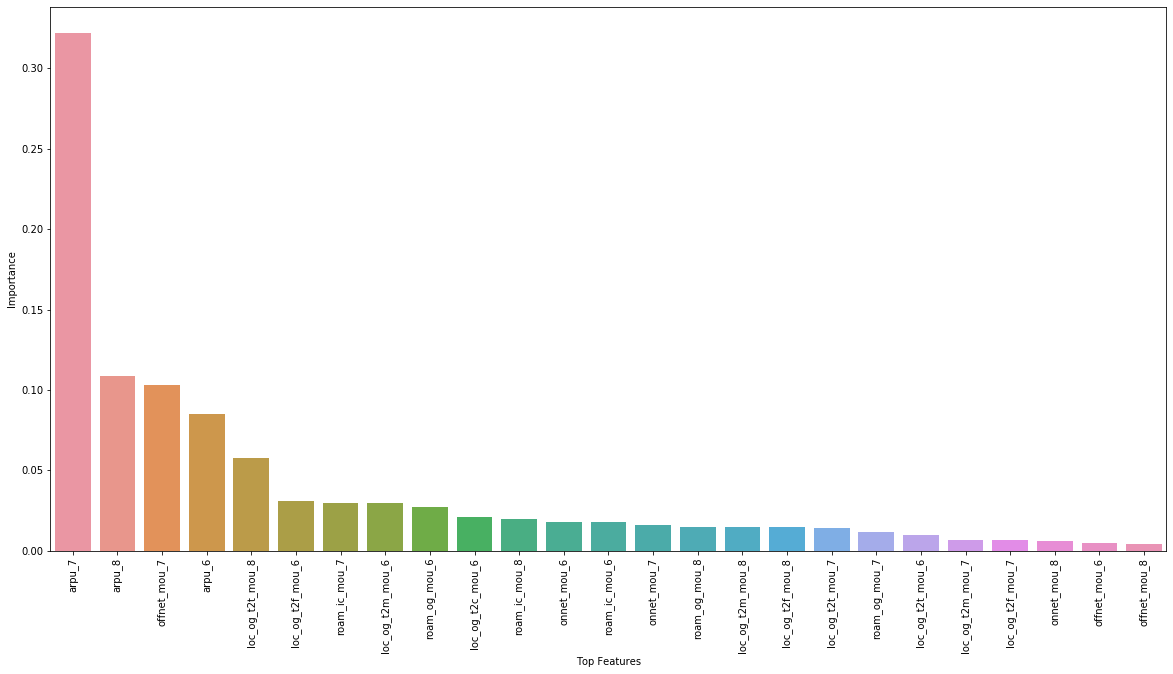

In [199]:
plt.figure(figsize=(20, 10))

ax = sns.barplot(x='Col', y = 'Importance', data=imp_p_df)
ax.set(xlabel = 'Top Features', ylabel = 'Importance')
plt.xticks(rotation = 90)
plt.show()

## Important Churn Predictors

#### 1.  arpu (average revenue) 

 arpu (average revenue) of customer is important in predicting wheather customer is willing to spend money to use the operator service.

If customer is not generating any revenue, then its a high alert, customer may churn in near future, as he is not happy with the service.

#### 2.  Calls

Another Important factor is the calls. Both incoming and outgoing calls made by customer.

Drop in these factor is also a high alert.

#### 3.  Roaming usage

Roaming is also an important factor, as customer are not getting good service in roaming, or charged more compared to other operators.

Hence Company should investigate roaming tariffs and quality of service.


## Strategies to reduce the Churn

#### 1.  Monitor User calls.

    If we see significant drop in outgoing calls, then we should roll out some offers to users like:

    -  Offers related to same network tarrifs cut
    -  More discounts on call-related recharges
    -  More recharge options
    

#### 2.  Investigate Roaming tarrifs and service quality

    - Compare current service quality with other compatitors
    - Revice/Reduce tarrifs on the roaming service


#### 3.  Average Revenue Generated by customer

    -   If use is not generating any revenue, roll out exiting offers for targeted users.
    -   If user has not generated any revenue in past two months, offer THAT user free data for few days
    -   Provide more felixble recharge options
    -   Have a campaigns for targetted users such as to provide extra benifits, discounts, vouchers on recharges
    -   Roll out attractive data recharge offers